# **Installing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ucimlrepo

# **Wine Dataset**

## ===== Prepare Dataset =====

In [ ]:
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=109)

In [ ]:
X = wine.data.features
y = wine.data.targets

In [ ]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


## ===== Principal Component Analysis (PCA) =====

Explained variance ratio by each component: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Cumulative explained variance: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


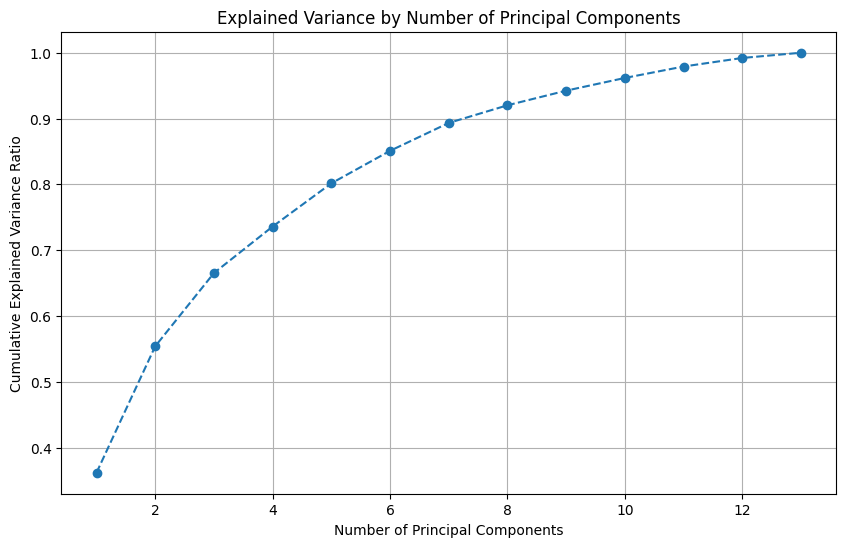

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by each component:", explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

Based on the cumulative explained variance plot, you can decide how many principal components to retain to capture a desired amount of variance. For example, to retain 95% of the variance, you would choose the number of components where the cumulative explained variance is close to 0.95.

Let's apply PCA with a chosen number of components (e.g., based on the plot).

In [ ]:
# Choose the number of components (e.g., to retain 95% variance)
# Based on the plot, let's assume we choose 10 components to retain most of the variance
n_components = 10 # You can change this based on your analysis of the plot

pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca_reduced.shape[1]}")
print("\nData after PCA:")
display(pd.DataFrame(X_pca_reduced).head())


Original number of features: 13
Reduced number of features after PCA: 10

Data after PCA:


,0,1,2,3,4,5,6,7,8,9
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366


## ===== SVM =====

### Different SVM models

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


training_sizes = [0.5, 0.6, 0.7, 0.8]
kernels = {
    'linear': 'linear',
    'polynomial': 'poly',
    'gaussian': 'rbf',
    'sigmoid': 'sigmoid'
}

### Calculate values for different test size

In [ ]:
results = []
confusion_matrices = []
trained_models = [] # Add a list to store trained models

for kernel_name, kernel in kernels.items():
  for size in training_sizes:
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
   svc = SVC(kernel=kernel, probability=True, random_state=42) # Add probability=True
   svc.fit(X_train, y_train.values.ravel())
   y_pred = svc.predict(X_test)

   acc = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) # Calculate weighted precision, handle zero division
   recall = recall_score(y_test, y_pred, average='weighted') # Calculate weighted recall
   f1 = f1_score(y_test, y_pred, average='weighted') # Calculate weighted F1-score


   cm = confusion_matrix(y_test, y_pred) # Calculate confusion matrix

   results.append({
       "Training size":int (size*100),
       "Accuracy":acc,
       "Precision": precision,
       "Recall": recall,
       "F1-score": f1,
       "Kernel":kernel_name
   })

   confusion_matrices.append({ # Store confusion matrix with metadata
       "Training size":int (size*100),
       "Kernel":kernel_name,
       "Confusion Matrix":cm
   })

   trained_models.append({ # Store the trained model with metadata
       "Training size":int (size*100),
       "Kernel":kernel_name,
       "Model": svc,
       "X_test": X_test,
       "y_test": y_test
   })

### Print Evalution Table and Graphs

,Training size,Accuracy,Precision,Recall,F1-score,Kernel
0,50,0.932584,0.933748,0.932584,0.932554,linear
1,60,0.934579,0.934670,0.934579,0.934515,linear
2,70,0.936000,0.936033,0.936000,0.935762,linear
3,80,0.860140,0.872143,0.860140,0.859931,linear
4,50,0.651685,0.651387,0.651685,0.640804,polynomial
5,60,0.644860,0.631917,0.644860,0.626031,polynomial
6,70,0.688000,0.676990,0.688000,0.671169,polynomial
7,80,0.671329,0.649877,0.671329,0.639471,polynomial
8,50,0.651685,0.667877,0.651685,0.657626,gaussian
9,60,0.663551,0.665705,0.663551,0.661062,gaussian


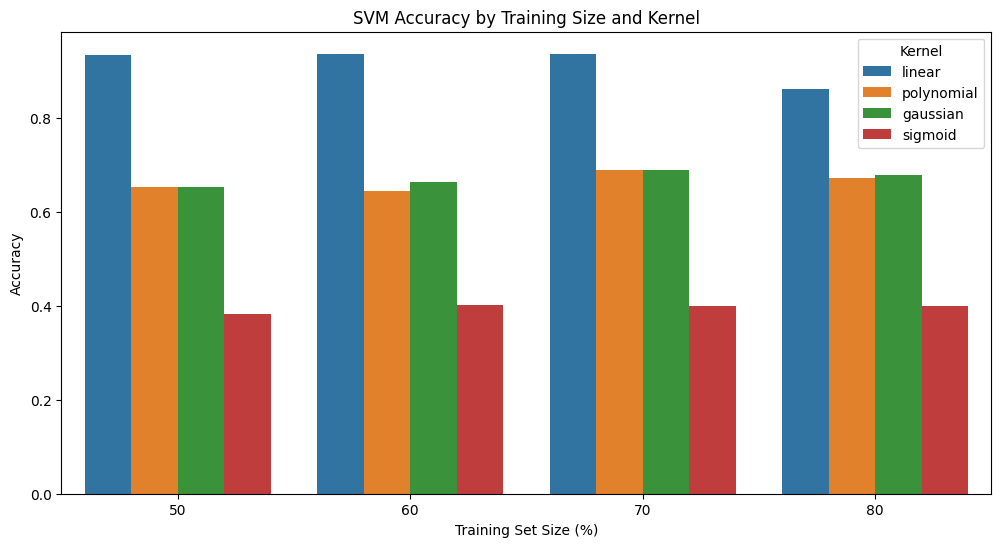

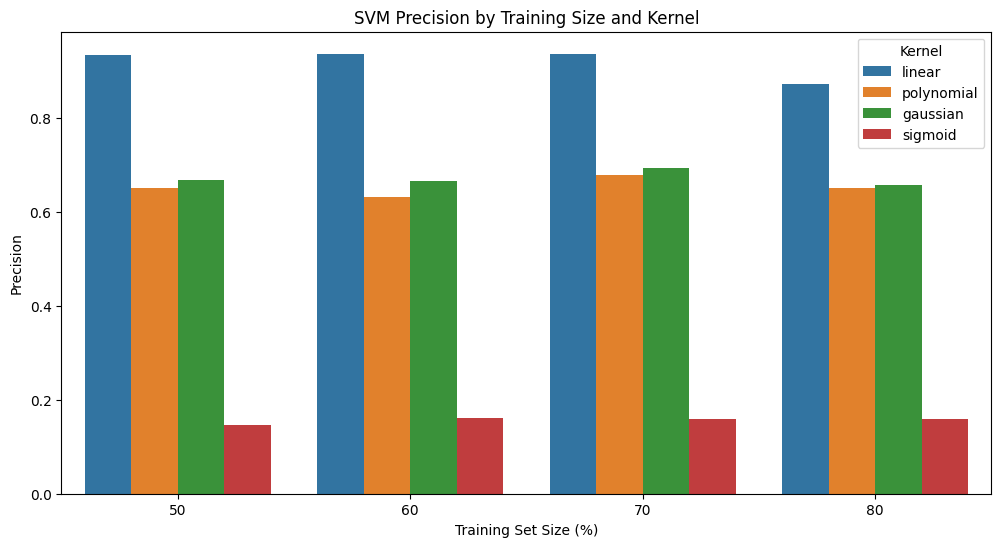

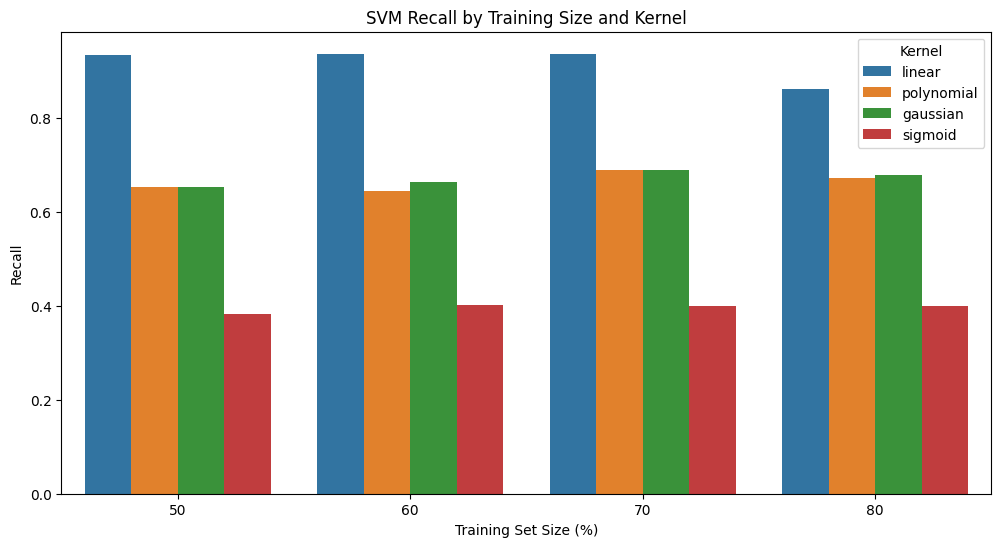

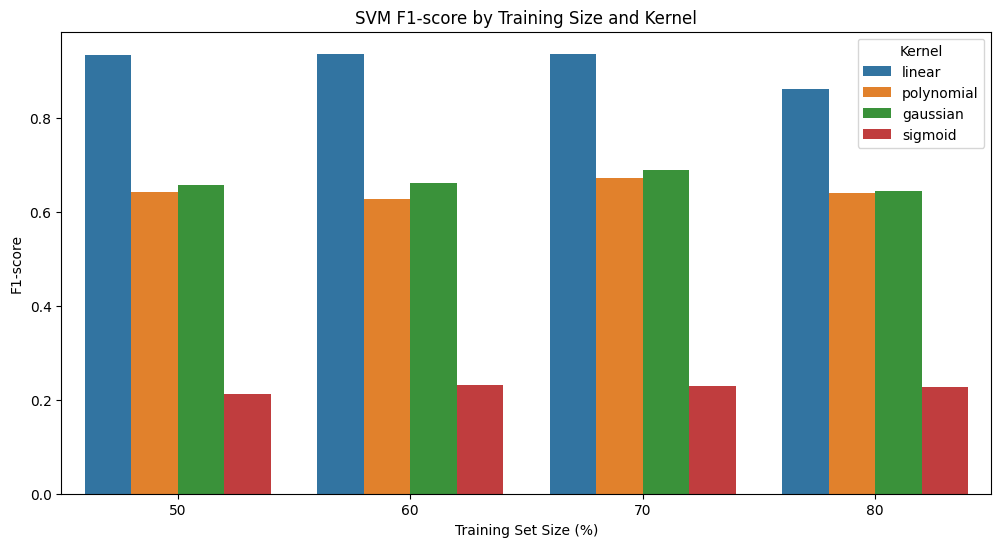

In [ ]:
df = pd.DataFrame(results)
display(df) # Display the DataFrame as a table

# Plot Accuracy
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Accuracy', hue='Kernel')
plt.title('SVM Accuracy by Training Size and Kernel') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Accuracy') # Add y-axis label
plt.show()

# Plot Precision
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Precision', hue='Kernel')
plt.title('SVM Precision by Training Size and Kernel') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Precision') # Add y-axis label
plt.show()

# Plot Recall
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Recall', hue='Kernel')
plt.title('SVM Recall by Training Size and Kernel') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Recall') # Add y-axis label
plt.show()

# Plot F1-score
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df, x='Training size', y='F1-score', hue='Kernel')
plt.title('SVM F1-score by Training Size and Kernel') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('F1-score') # Add y-axis label
plt.show()

### Show Confusion Matrices

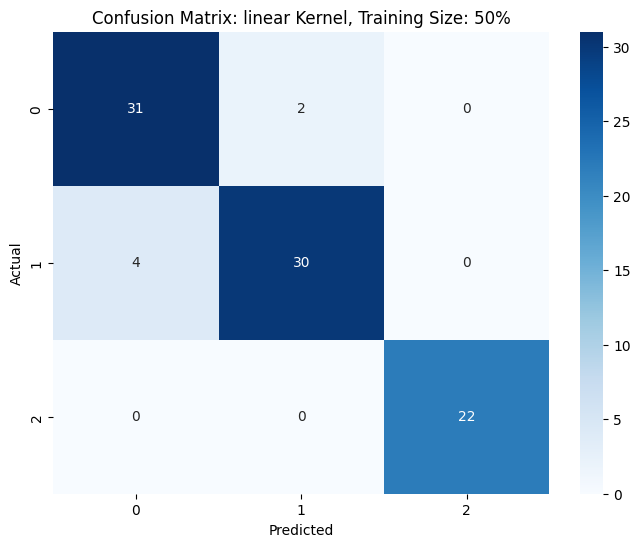

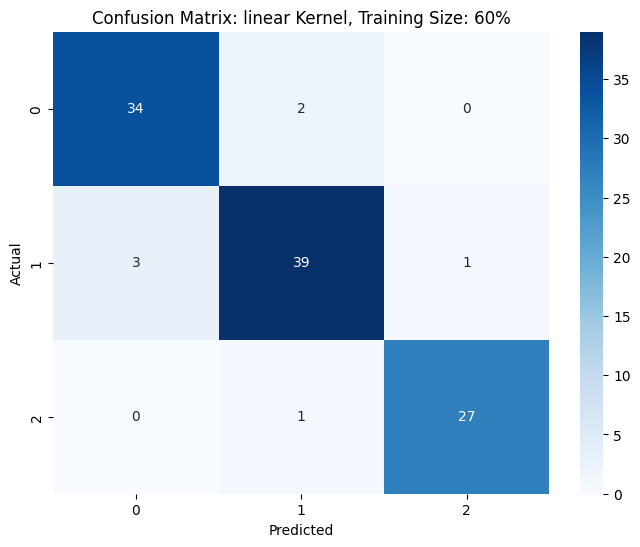

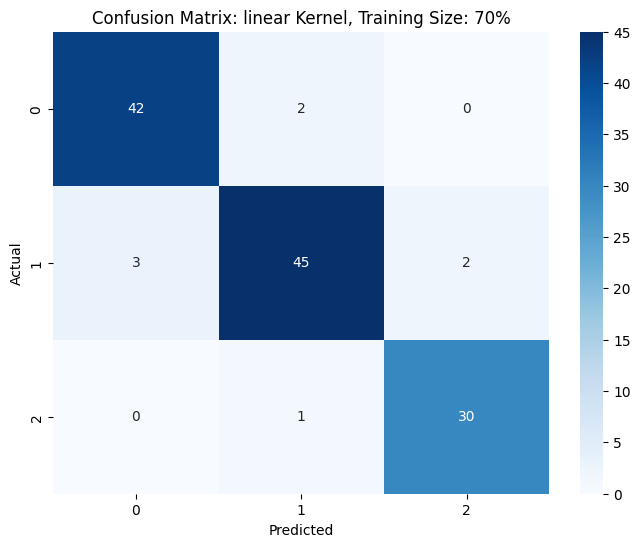

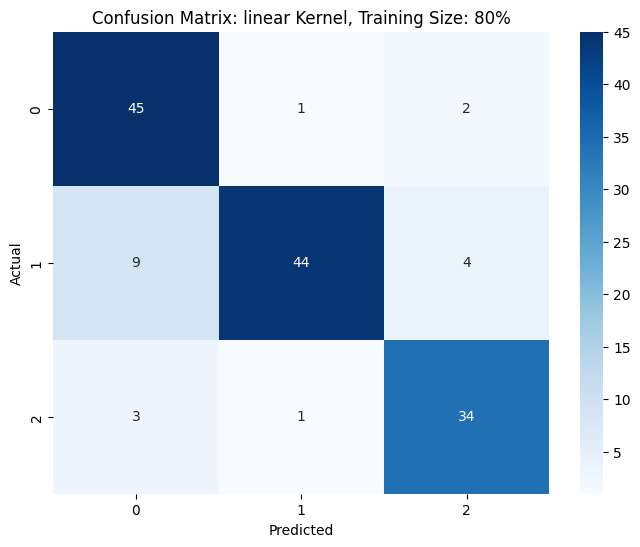

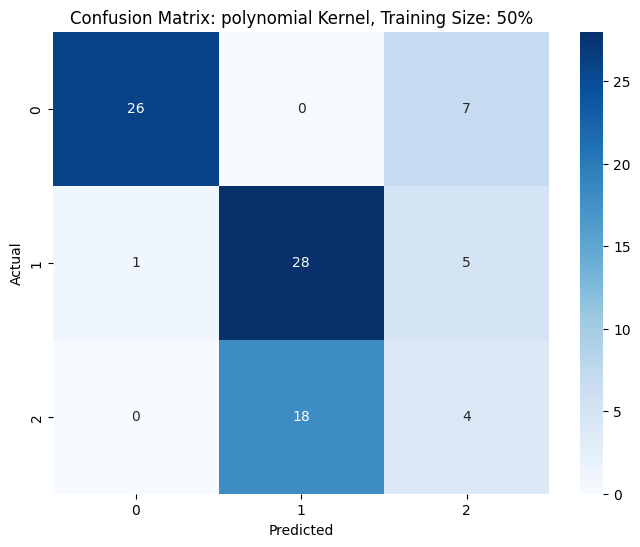

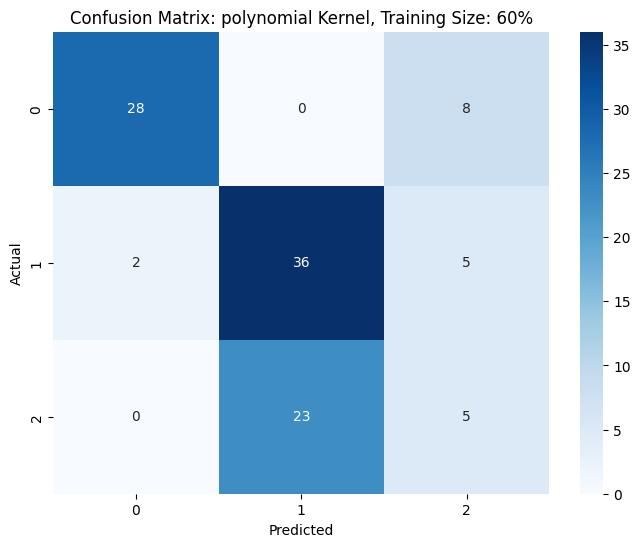

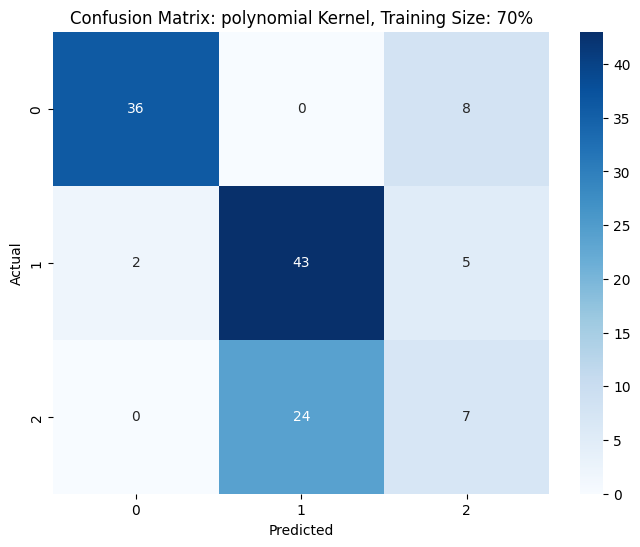

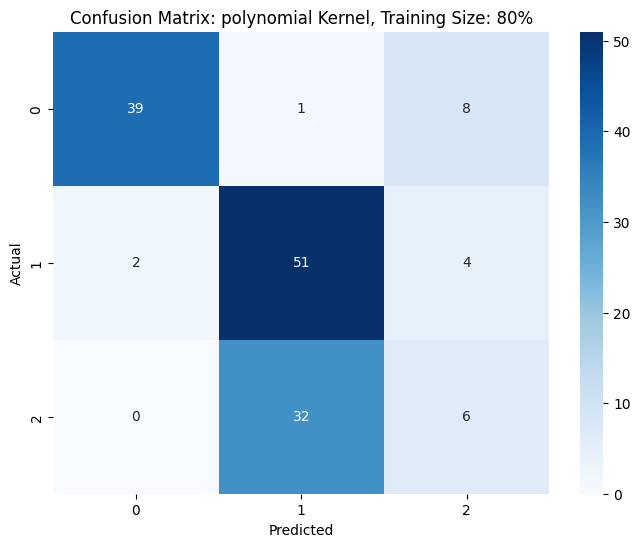

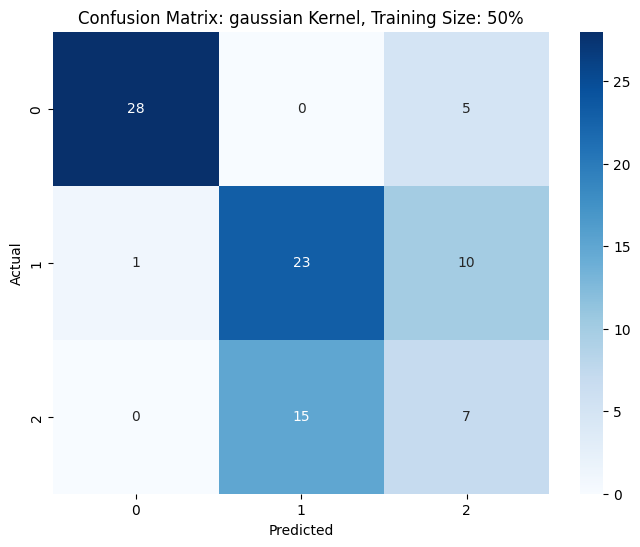

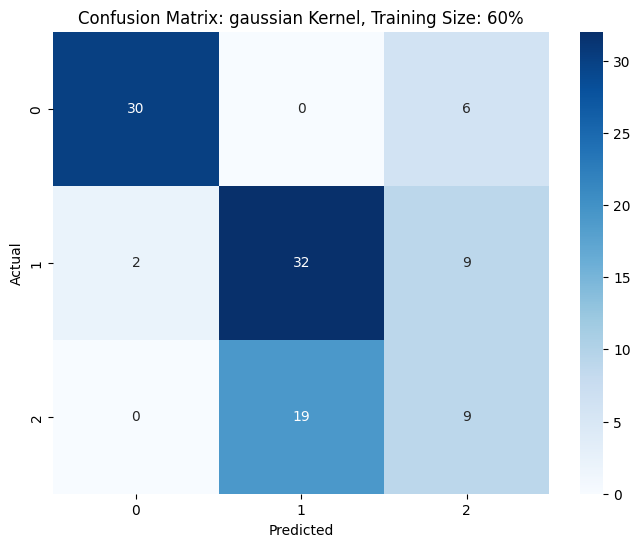

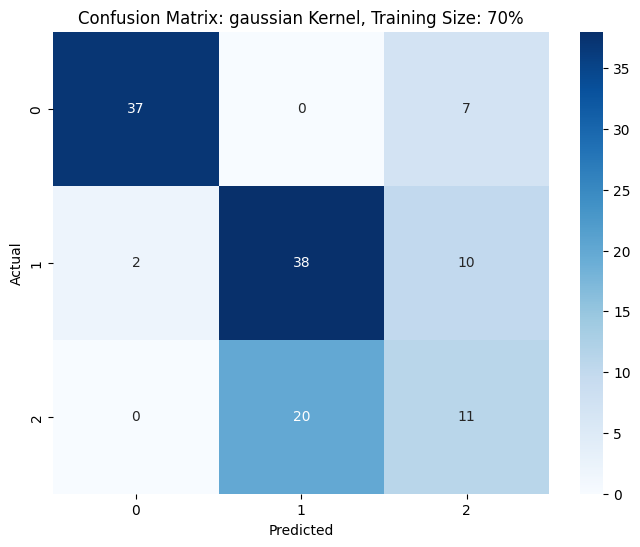

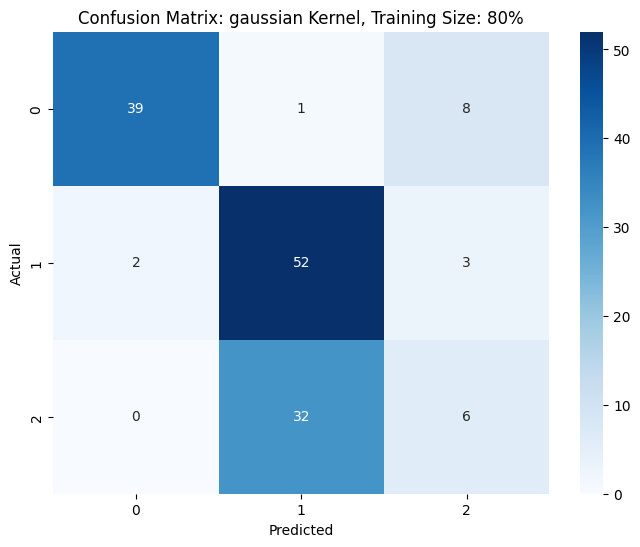

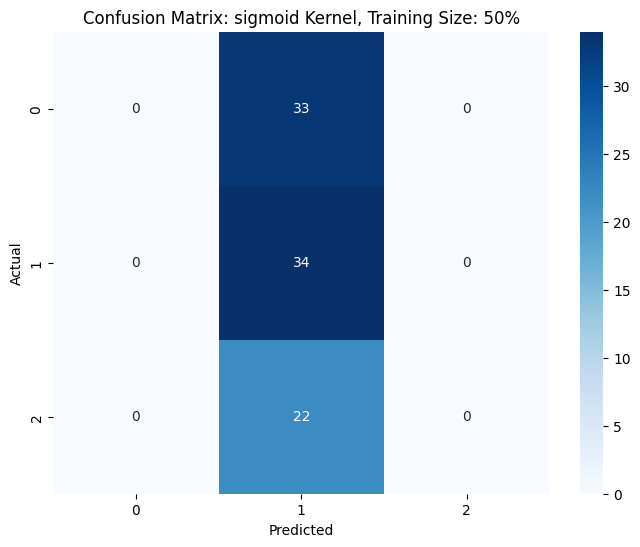

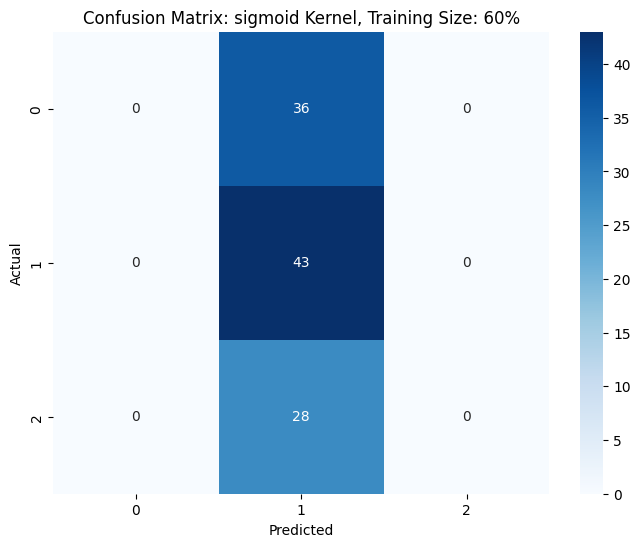

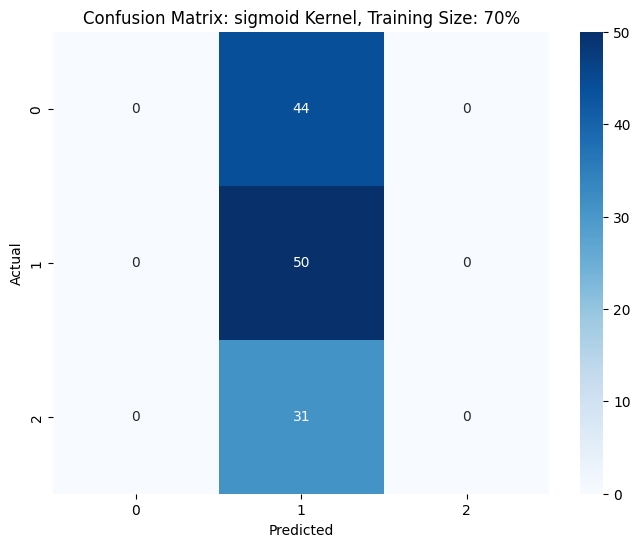

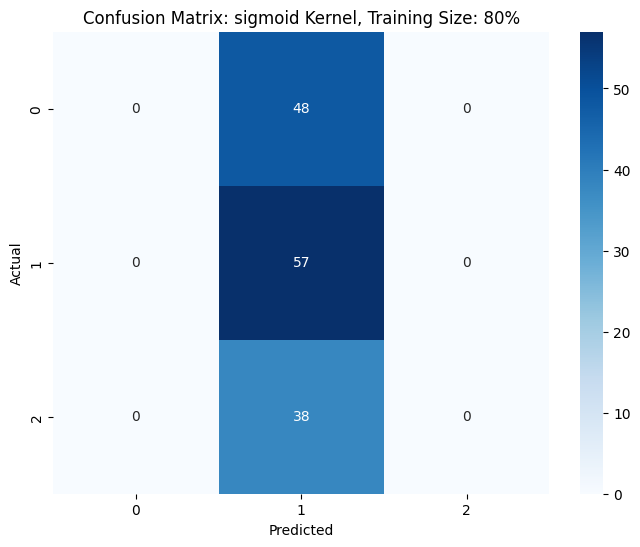

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices:
    cm = cm_data["Confusion Matrix"]
    kernel_name = cm_data["Kernel"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {kernel_name} Kernel, Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### ROC and AOC curve

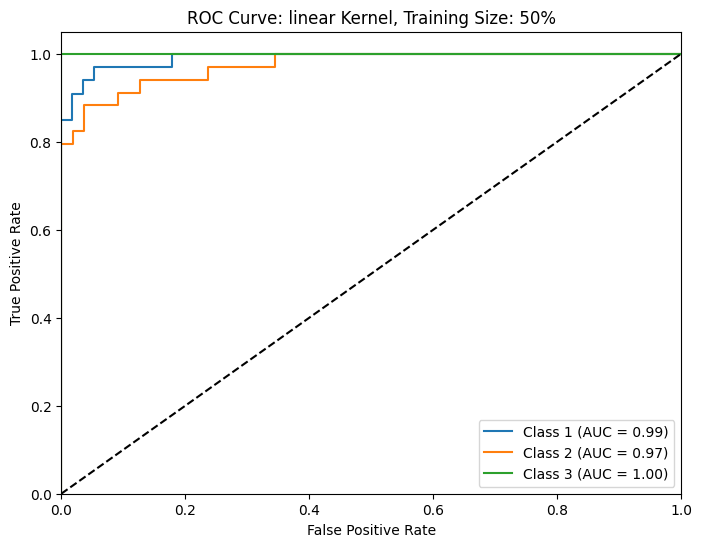

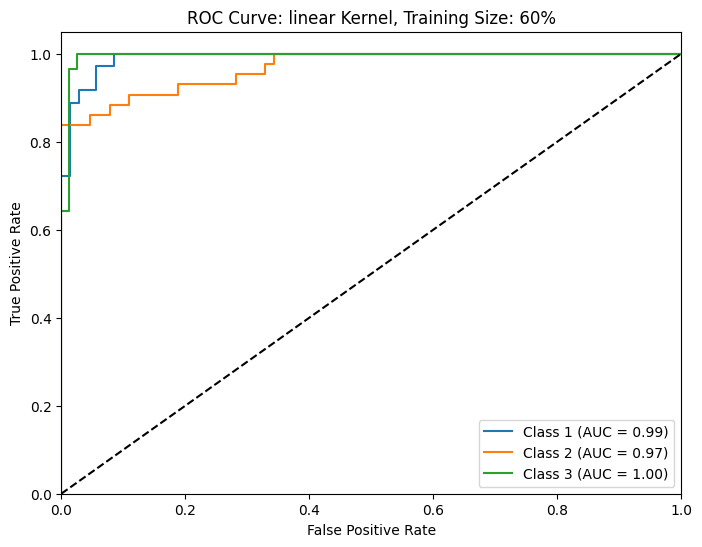

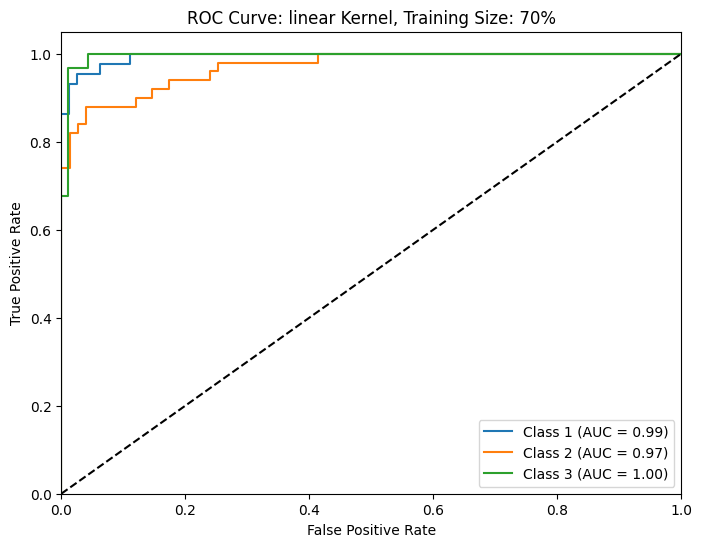

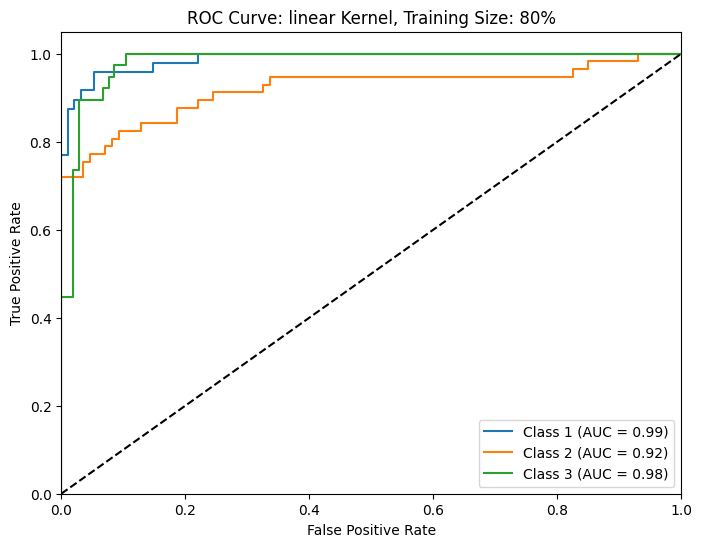

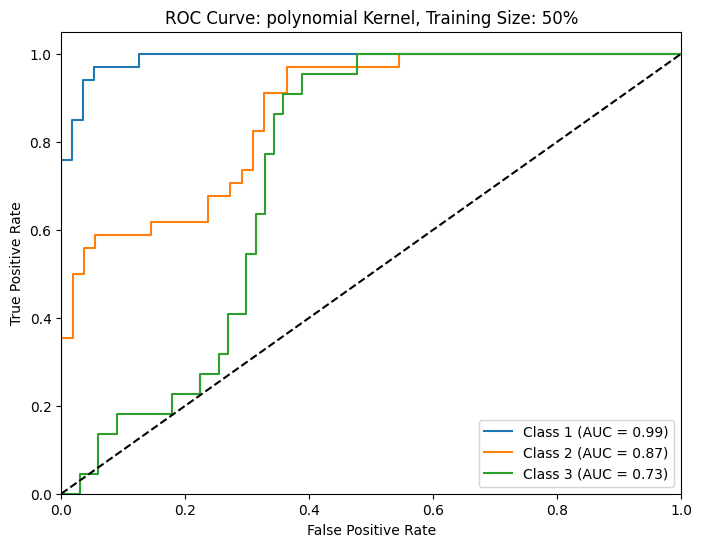

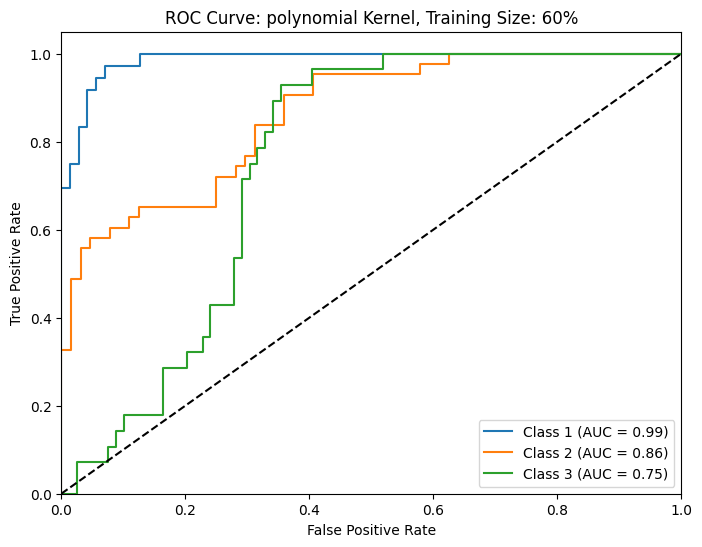

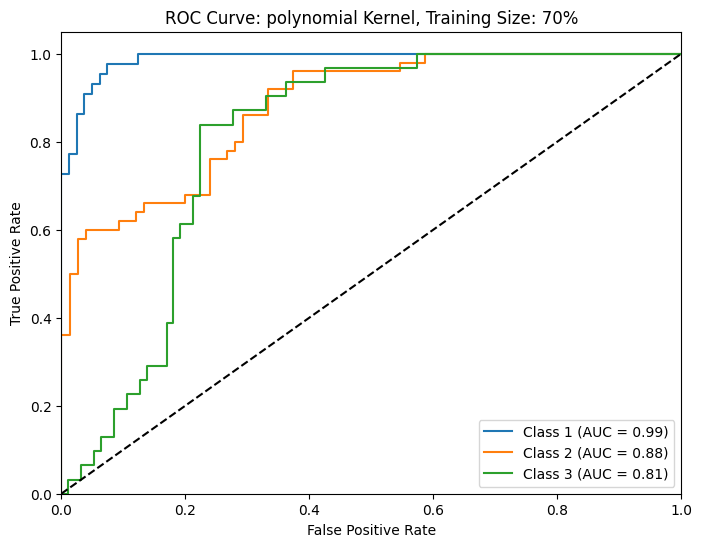

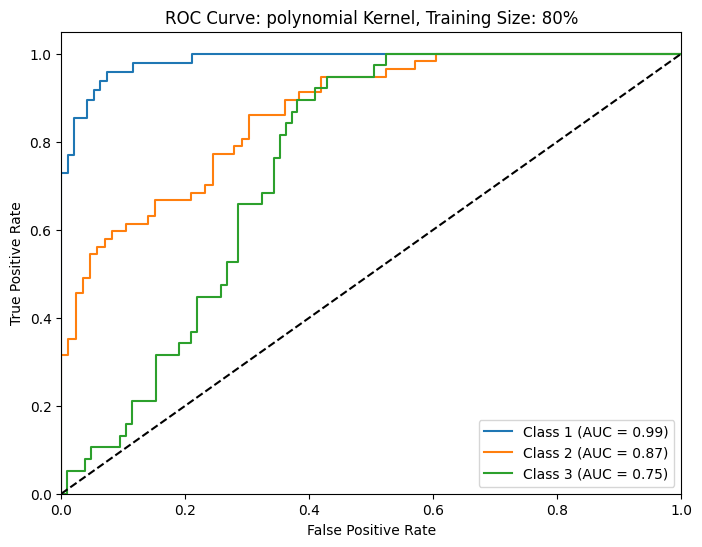

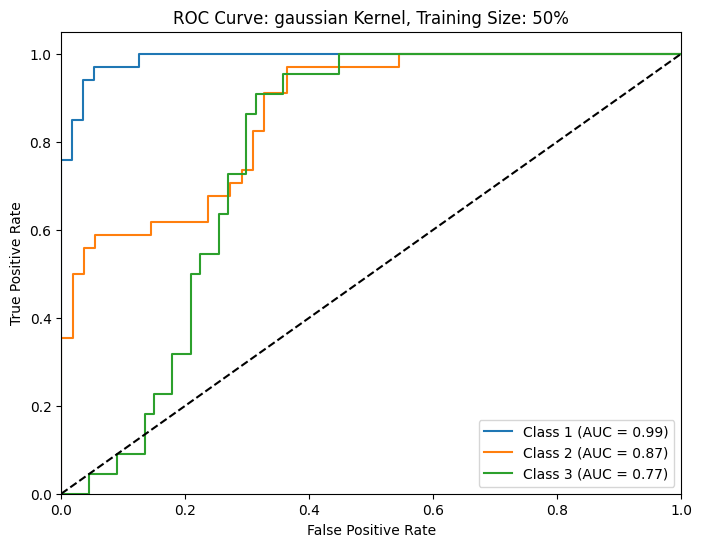

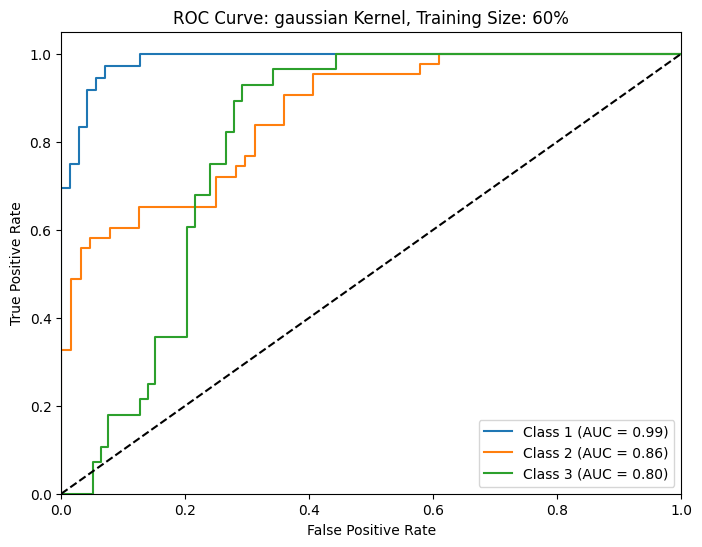

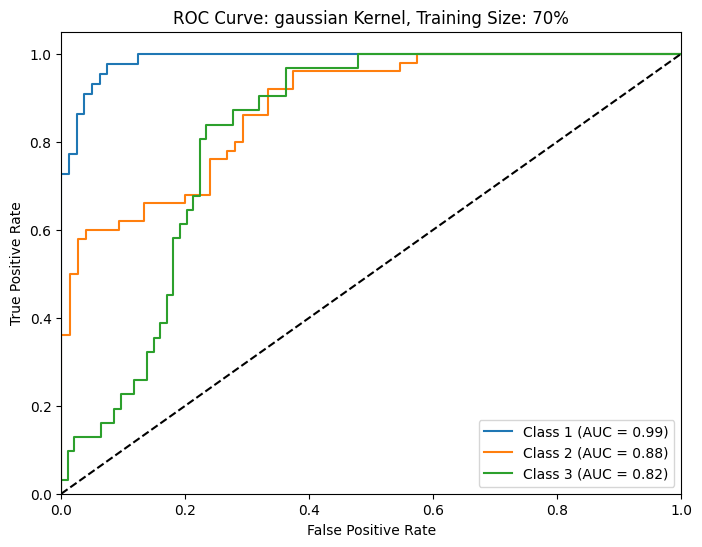

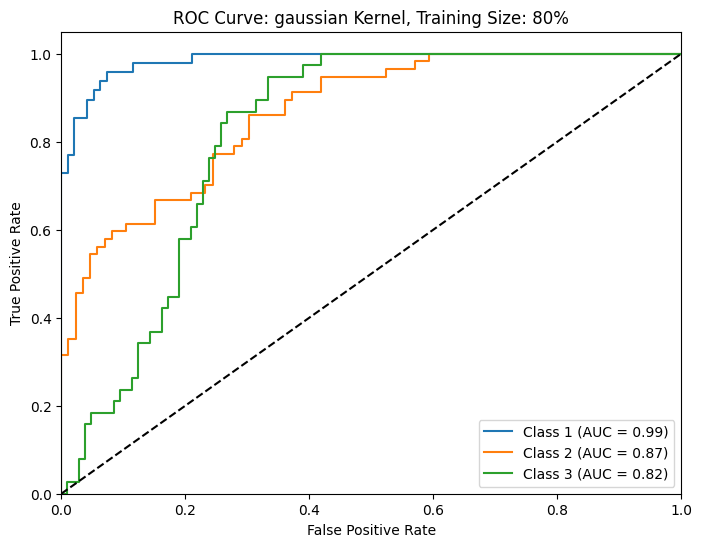

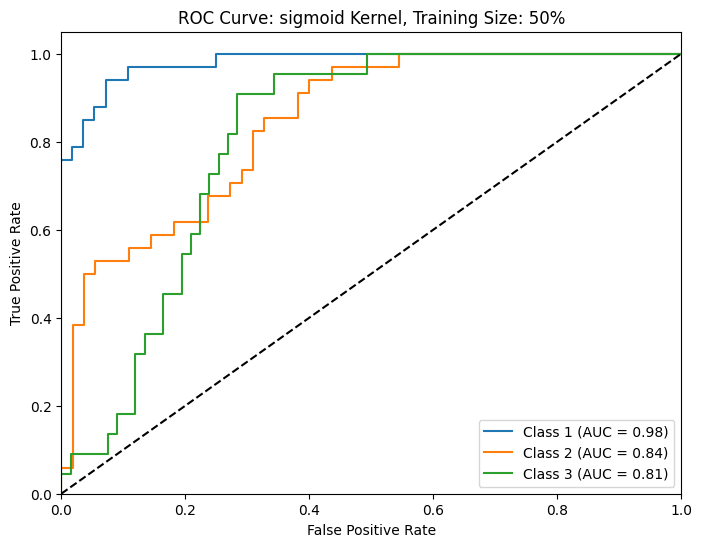

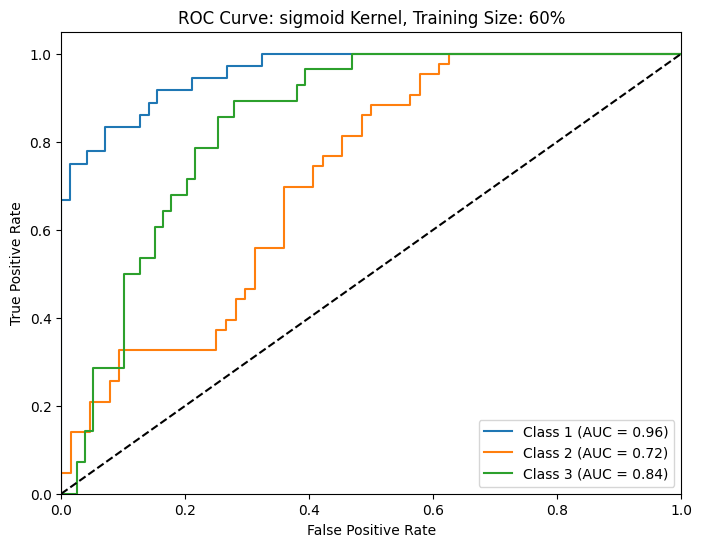

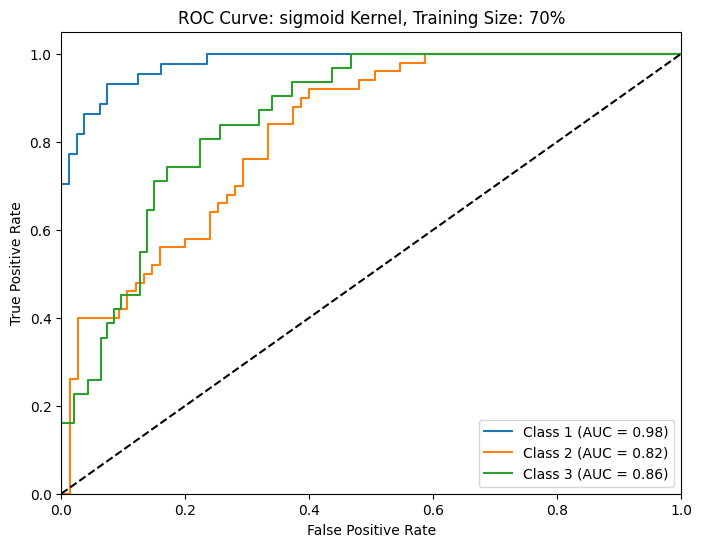

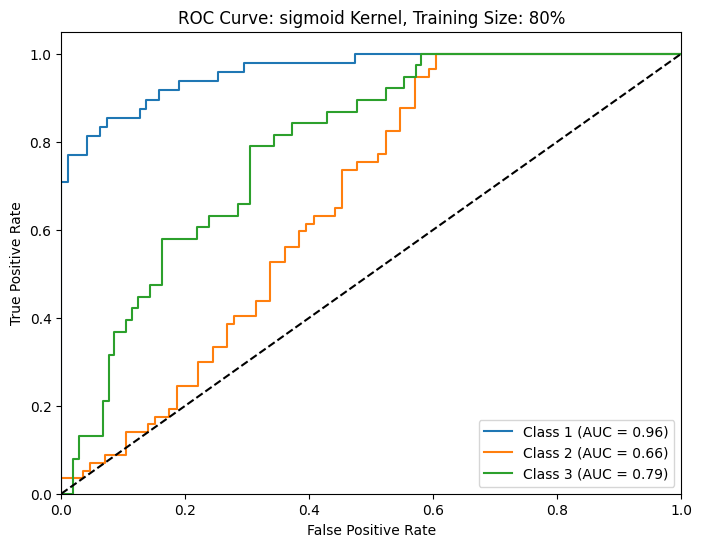

In [ ]:
from sklearn.metrics import roc_curve, auc

# Since this is a multi-class problem, we'll use a One-vs-Rest (OvR) approach for ROC curves
for model_data in trained_models:
    model = model_data["Model"]
    X_test = model_data["X_test"]
    y_test = model_data["y_test"]
    kernel_name = model_data["Kernel"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(8, 6)) # Create a new figure for each plot

    # Get predicted probabilities for each class
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class using OvR
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(y_test))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i+1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--') # Plot random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {kernel_name} Kernel, Training Size: {training_size}%') # Add title for each plot
    plt.legend(loc="lower right")
    plt.show()

### Calculate values for different test size using PCA-reduced data

In [ ]:
results_pca = []
confusion_matrices_pca = []

for kernel_name, kernel in kernels.items():
  for size in training_sizes:
   X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=size, random_state=42)
   svc_pca = SVC(kernel=kernel, probability=True, random_state=42) # Add probability=True
   svc_pca.fit(X_train_pca, y_train.values.ravel())
   y_pred_pca = svc_pca.predict(X_test_pca)

   acc_pca = accuracy_score(y_test, y_pred_pca)
   precision_pca = precision_score(y_test, y_pred_pca, average='weighted', zero_division=0) # Calculate weighted precision, handle zero division
   recall_pca = recall_score(y_test, y_pred_pca, average='weighted') # Calculate weighted recall
   f1_pca = f1_score(y_test, y_pred_pca, average='weighted') # Calculate weighted F1-score


   cm_pca = confusion_matrix(y_test, y_pred_pca) # Calculate confusion matrix

   results_pca.append({
       "Training size":int (size*100),
       "Accuracy":acc_pca,
       "Precision": precision_pca,
       "Recall": recall_pca,
       "F1-score": f1_pca,
       "Kernel":kernel_name
   })
   confusion_matrices_pca.append({ # Store confusion matrix with metadata
       "Training size":int (size*100),
       "Kernel":kernel_name,
       "Confusion Matrix":cm_pca
   })

### Print Accuracy, Precision, Recall, and F1-score Table and Graphs for PCA-Reduced Data

,Training size,Accuracy,Precision,Recall,F1-score,Kernel
0,50,0.988764,0.989085,0.988764,0.988715,linear
1,60,0.953271,0.956072,0.953271,0.953166,linear
2,70,0.960000,0.962150,0.960000,0.960011,linear
3,80,0.951049,0.954736,0.951049,0.950406,linear
4,50,0.876404,0.906617,0.876404,0.874846,polynomial
5,60,0.869159,0.892997,0.869159,0.869891,polynomial
6,70,0.880000,0.900444,0.880000,0.879207,polynomial
7,80,0.825175,0.870248,0.825175,0.825552,polynomial
8,50,0.977528,0.978777,0.977528,0.977632,gaussian
9,60,0.981308,0.982139,0.981308,0.981370,gaussian


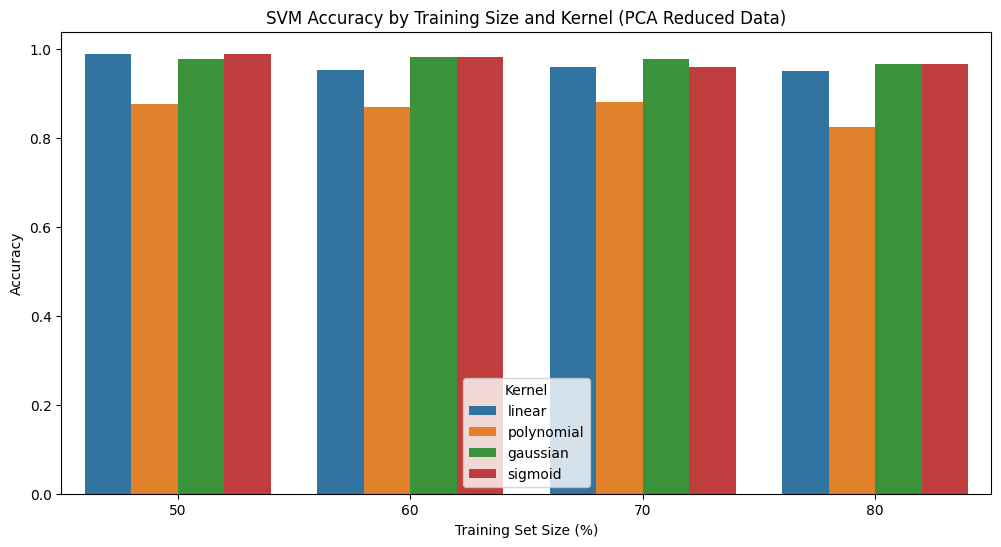

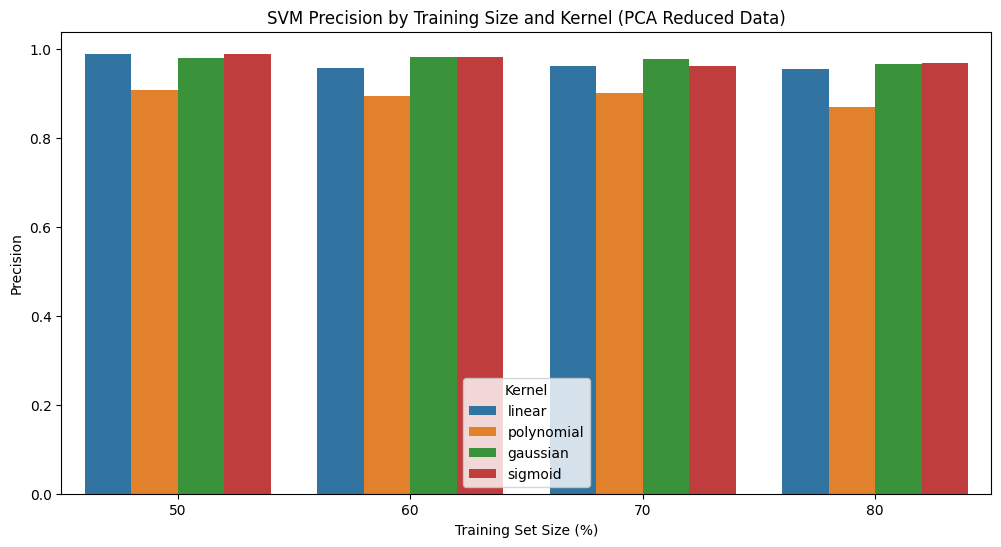

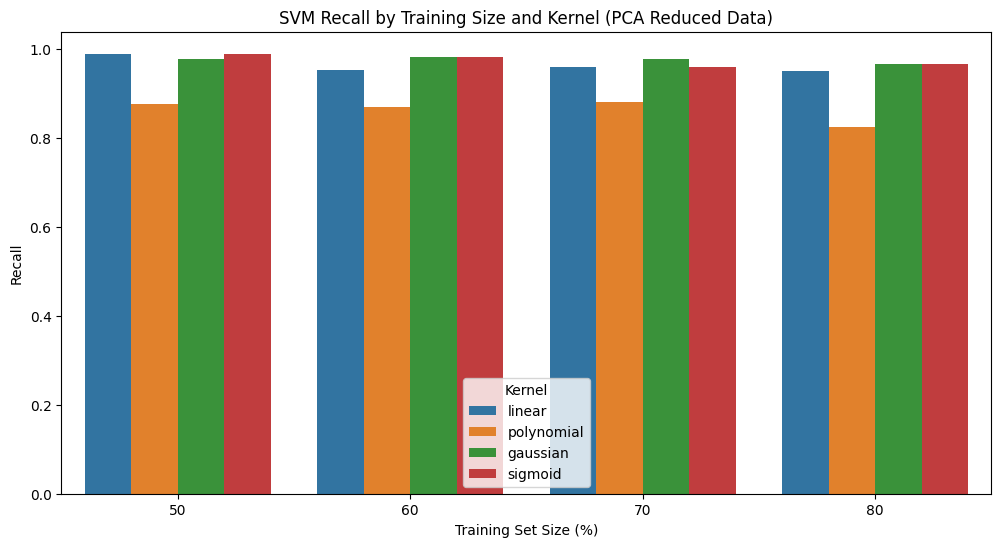

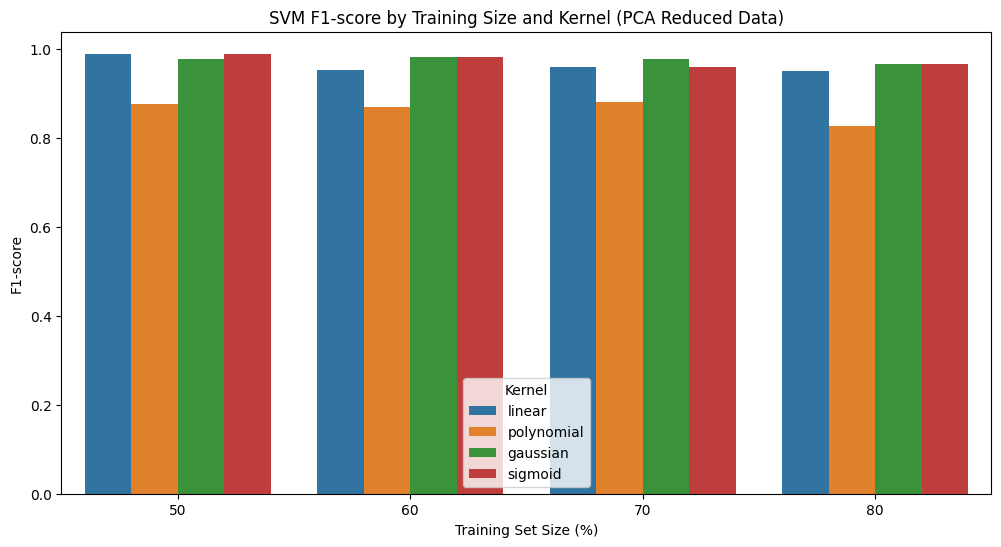

In [ ]:
df_pca = pd.DataFrame(results_pca)
display(df_pca) # Display the DataFrame as a table

# Plot Accuracy
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df_pca, x='Training size', y='Accuracy', hue='Kernel')
plt.title('SVM Accuracy by Training Size and Kernel (PCA Reduced Data)') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Accuracy') # Add y-axis label
plt.show()

# Plot Precision
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df_pca, x='Training size', y='Precision', hue='Kernel')
plt.title('SVM Precision by Training Size and Kernel (PCA Reduced Data)') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Precision') # Add y-axis label
plt.show()

# Plot Recall
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df_pca, x='Training size', y='Recall', hue='Kernel')
plt.title('SVM Recall by Training Size and Kernel (PCA Reduced Data)') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Recall') # Add y-axis label
plt.show()

# Plot F1-score
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df_pca, x='Training size', y='F1-score', hue='Kernel')
plt.title('SVM F1-score by Training Size and Kernel (PCA Reduced Data)') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('F1-score') # Add y-axis label
plt.show()

### Show Confusion Matrices for PCA-Reduced Data

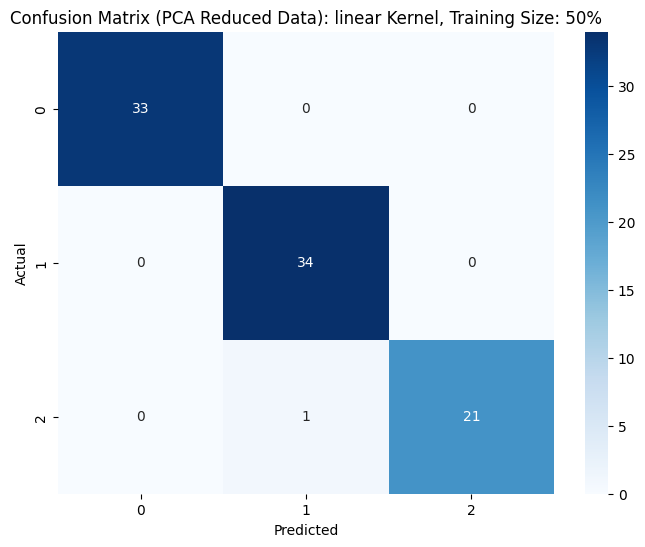

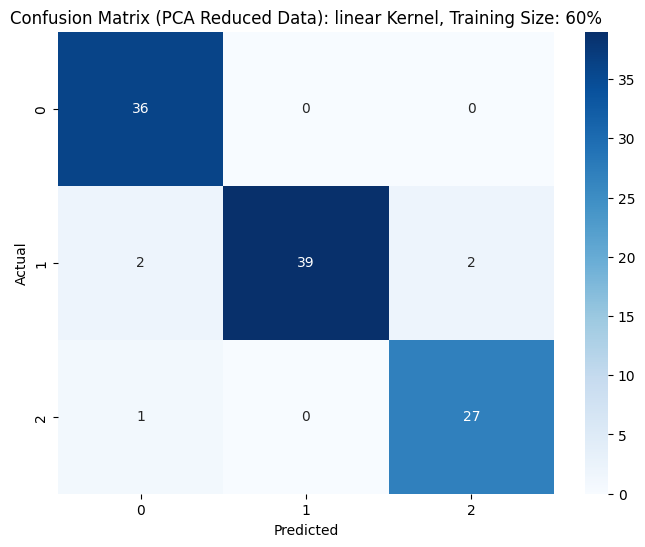

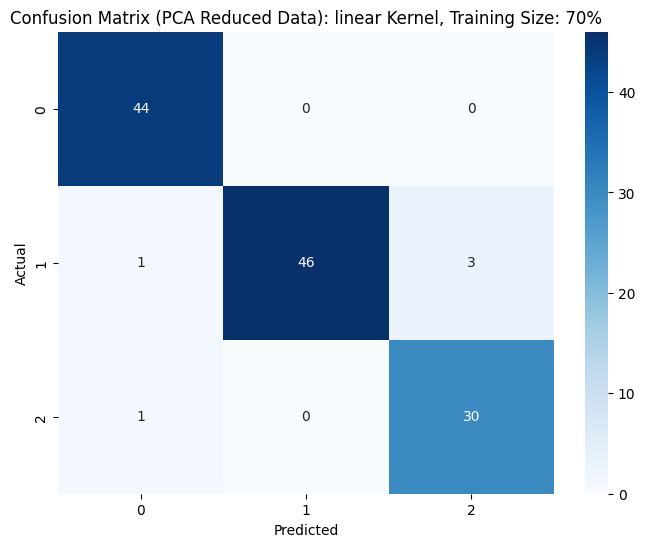

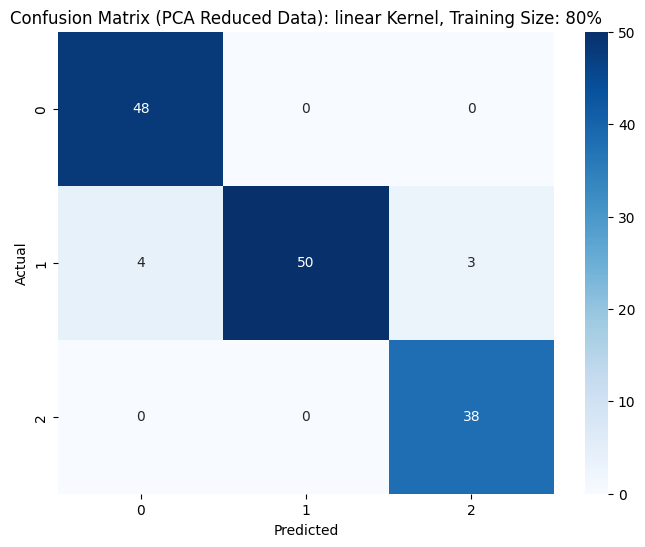

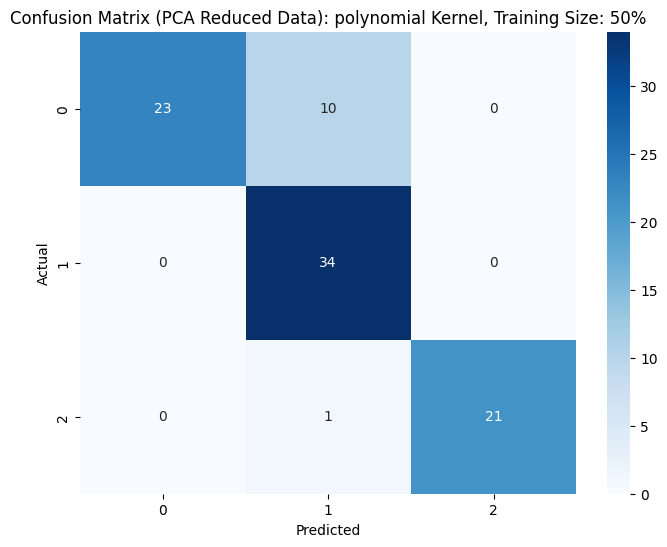

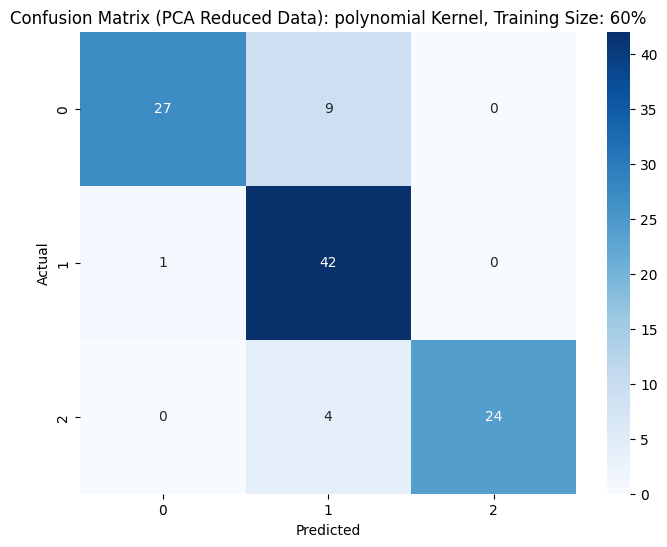

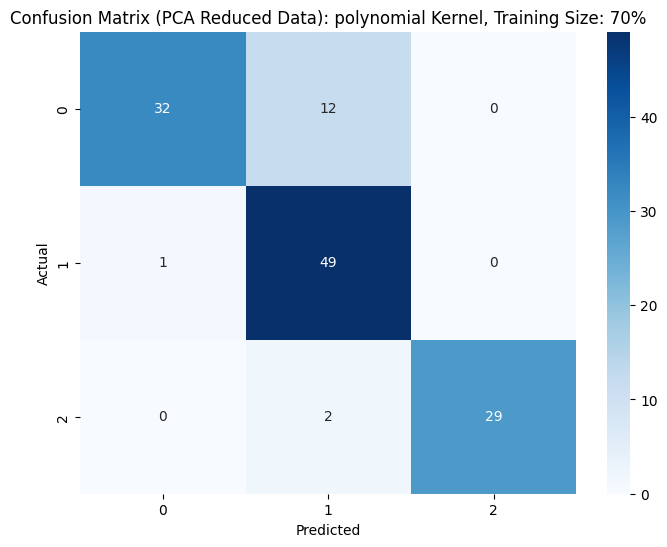

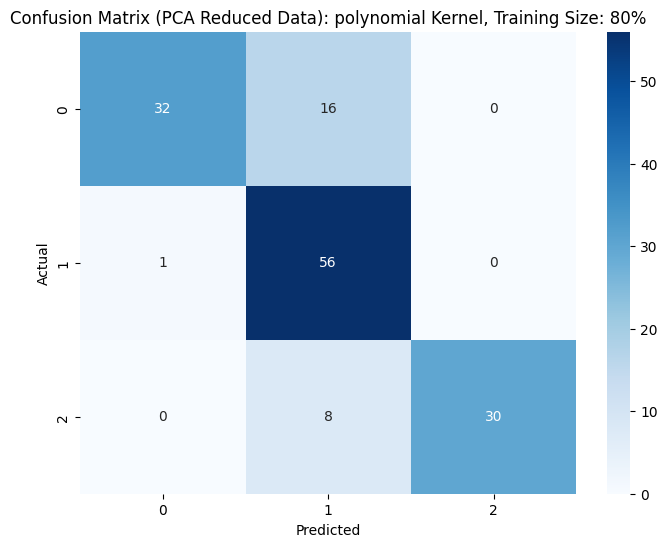

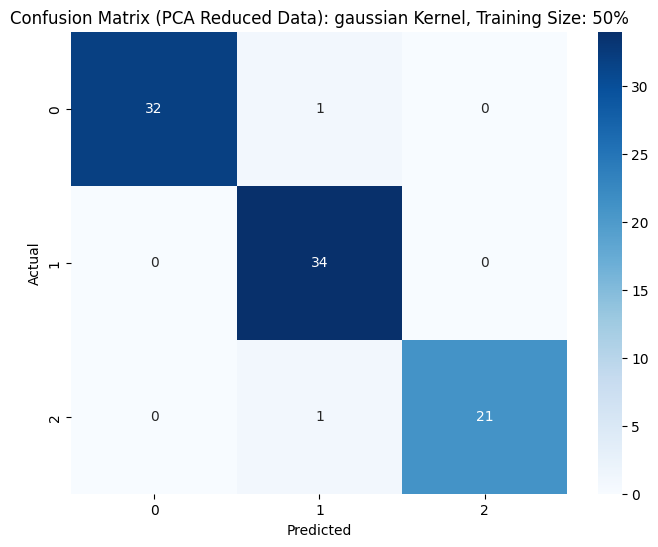

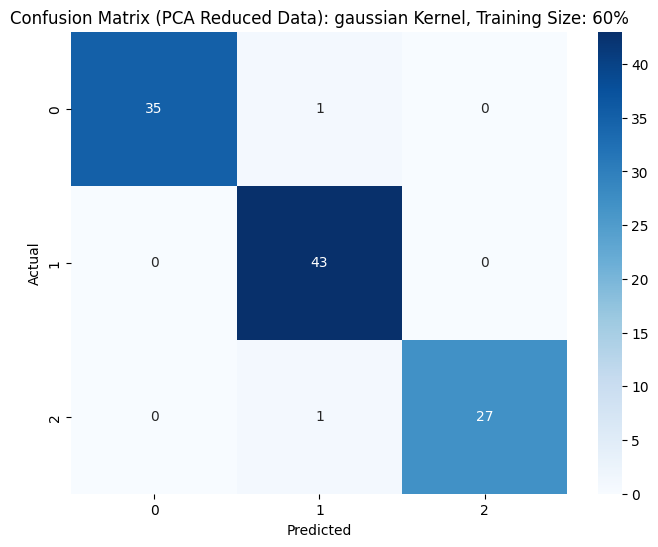

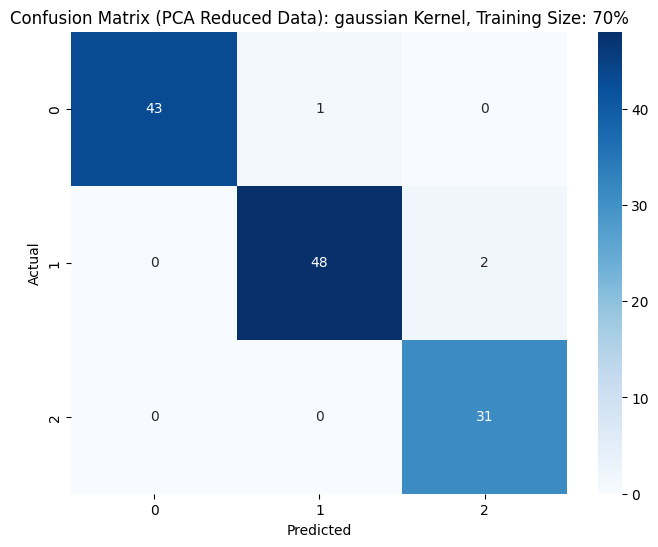

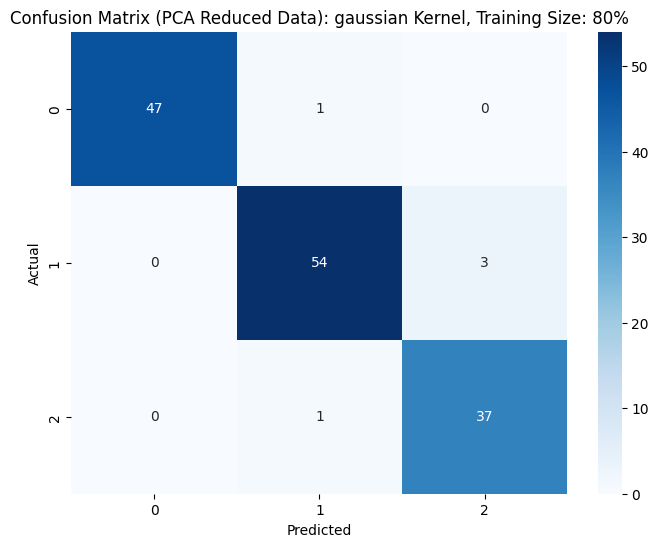

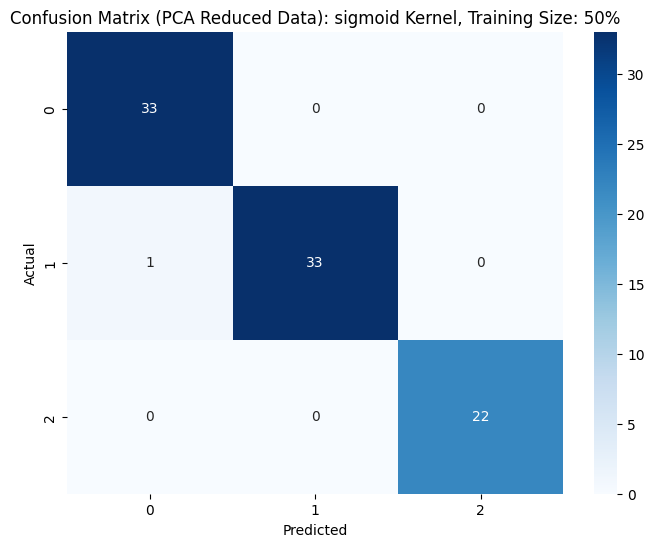

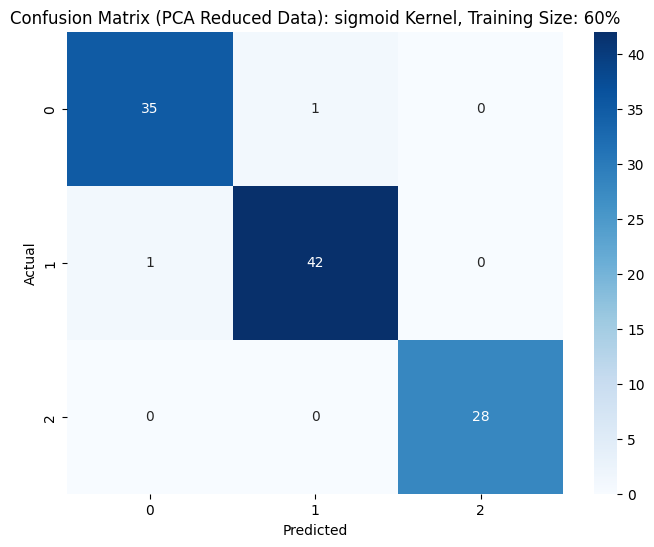

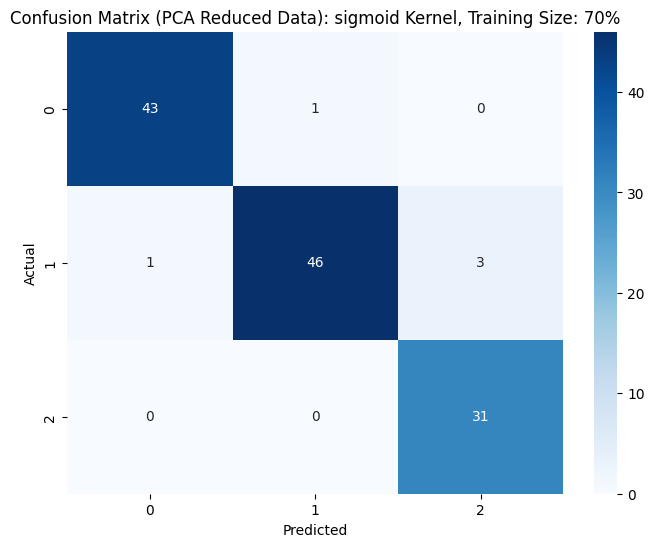

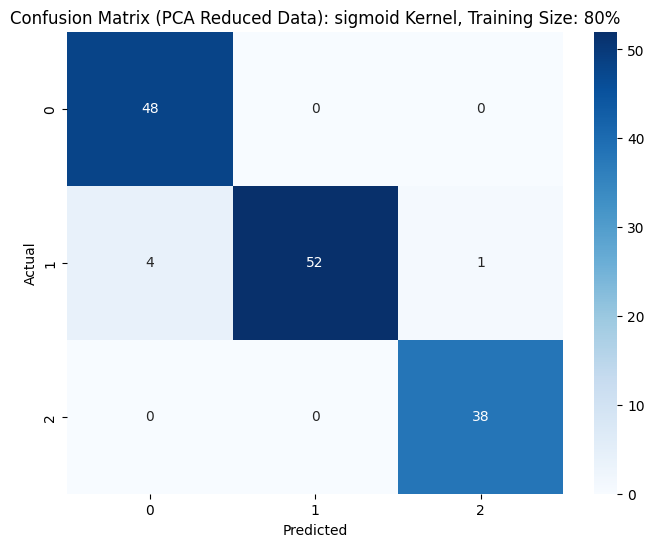

In [ ]:
for cm_data in confusion_matrices_pca:
    cm = cm_data["Confusion Matrix"]
    kernel_name = cm_data["Kernel"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (PCA Reduced Data): {kernel_name} Kernel, Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## ===== MLP =====

### Calculate values for different test size

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

training_sizes = [0.5, 0.6, 0.7, 0.8]

results_mlp = []
confusion_matrices_mlp = []
trained_models_mlp = []

for size in training_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)

    # Initialize MLPClassifier
    # You might need to tune the hyperparameters like hidden_layer_sizes, activation, solver, etc.
    mlp = MLPClassifier(max_iter=1500, momentum=0.7, learning_rate_init=0.0005) # Increased max_iter

    mlp.fit(X_train, y_train.values.ravel())
    y_pred = mlp.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)

    results_mlp.append({
        "Training size": int(size * 100),
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })
    confusion_matrices_mlp.append({
        "Training size": int(size * 100),
        "Confusion Matrix": cm
    })
    trained_models_mlp.append({ # Store the trained model with metadata
      "Training size":int (size*100),
      "Model": mlp,
      "X_test": X_test,
      "y_test": y_test
    })

### Print Evalution Table and Graphs

,Training size,Accuracy,Precision,Recall,F1-score
0,50,0.505618,0.454262,0.505618,0.441859
1,60,0.336449,0.113198,0.336449,0.169401
2,70,0.656000,0.724503,0.656000,0.678092
3,80,0.587413,0.519894,0.587413,0.505192


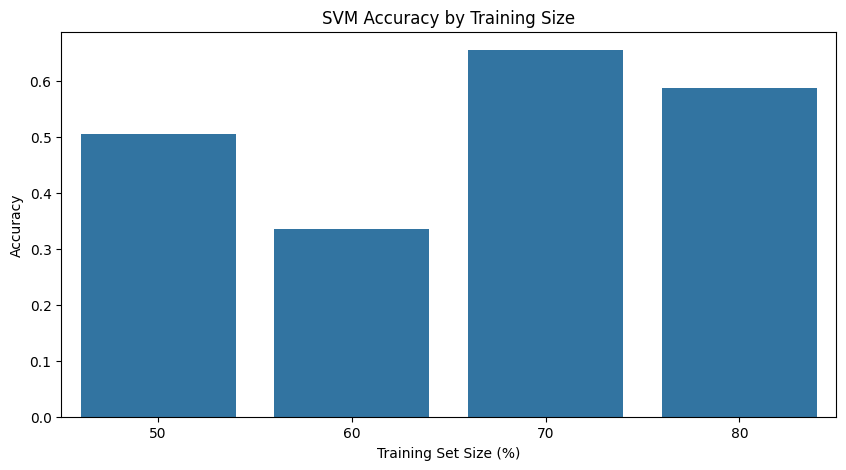

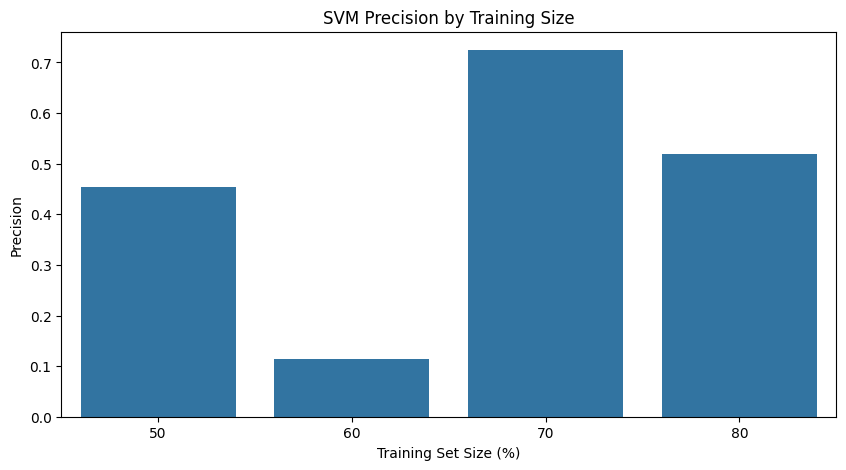

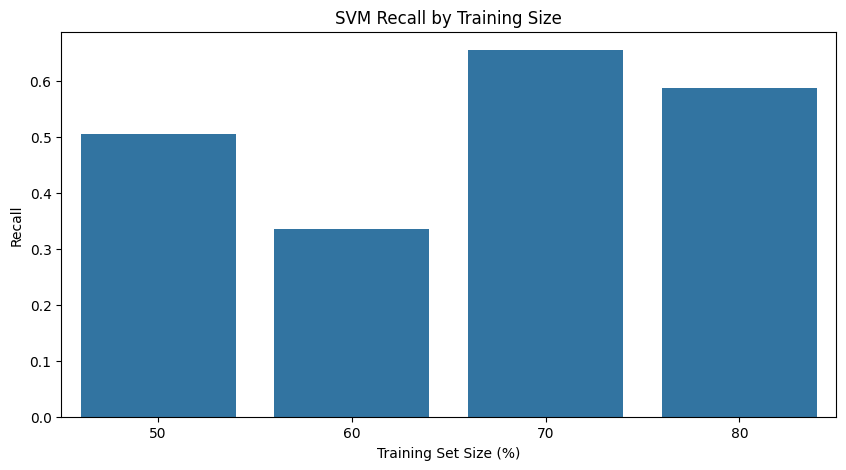

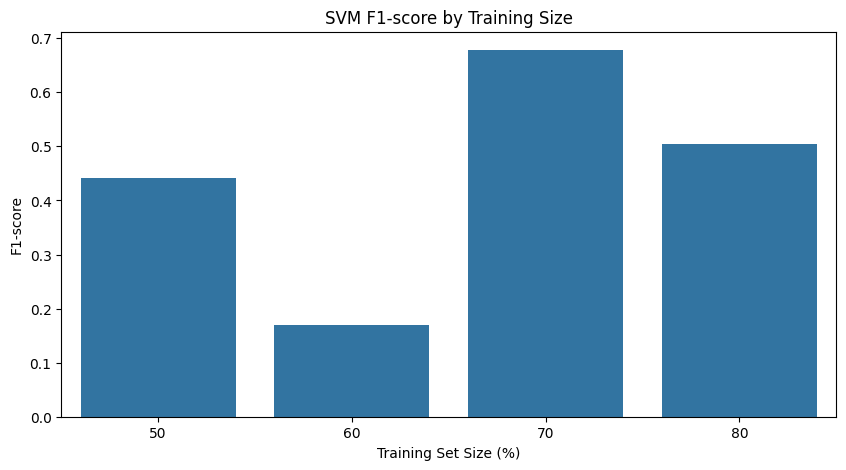

In [ ]:
df = pd.DataFrame(results_mlp)
display(df) # Display the DataFrame as a table

# Plot Accuracy
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Accuracy')
plt.title('SVM Accuracy by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Accuracy') # Add y-axis label
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Precision')
plt.title('SVM Precision by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Precision') # Add y-axis label
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Recall')
plt.title('SVM Recall by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Recall') # Add y-axis label
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='F1-score')
plt.title('SVM F1-score by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('F1-score') # Add y-axis label
plt.show()

### Show Confusion Matrices

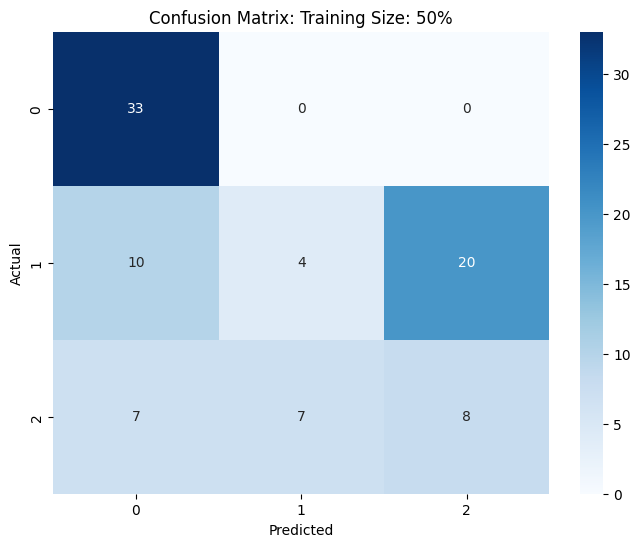

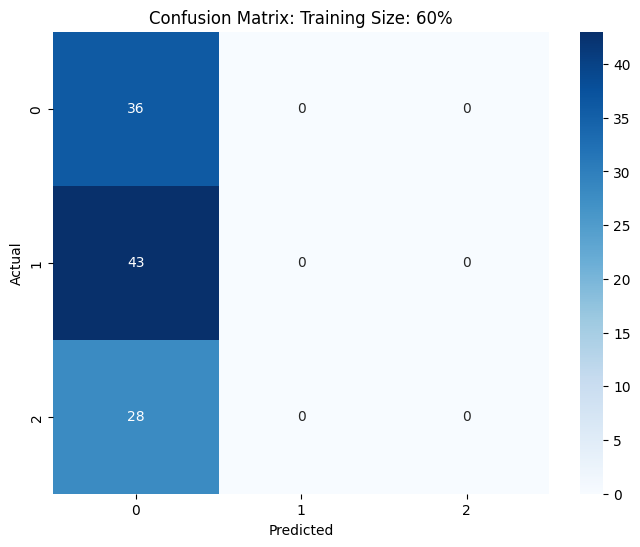

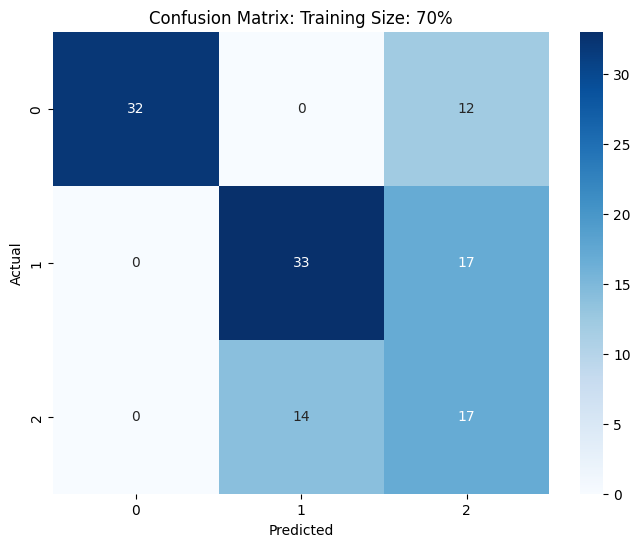

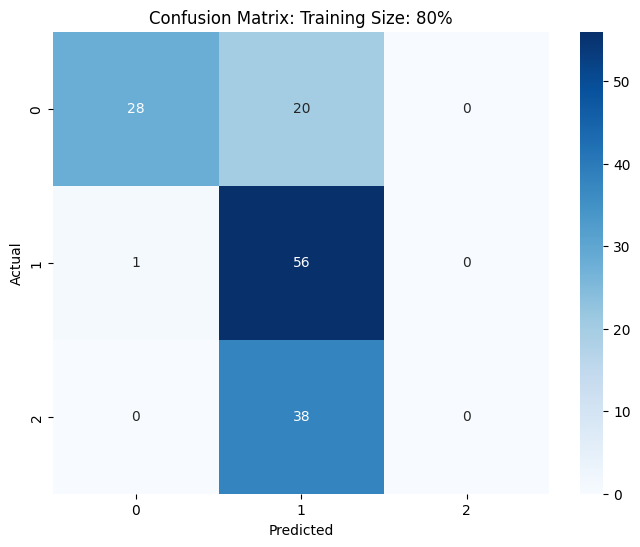

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices_mlp:
    cm = cm_data["Confusion Matrix"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Training and Loss generation curve

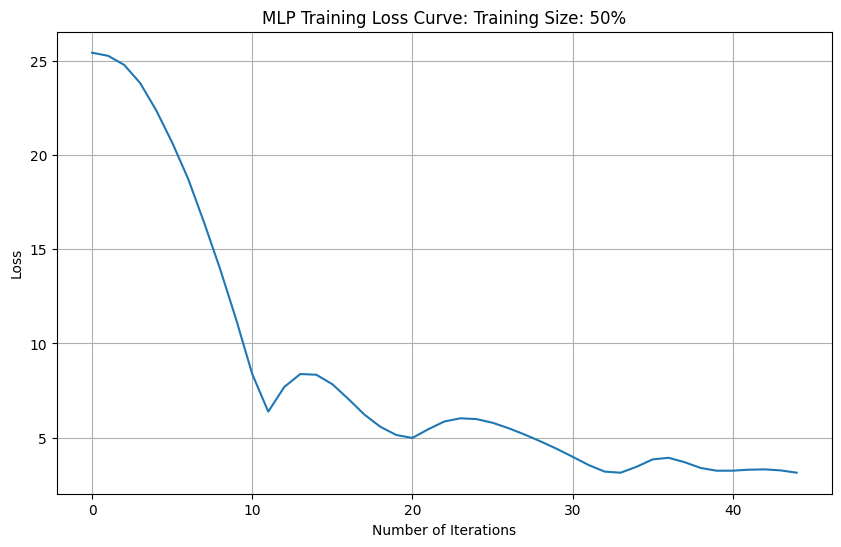

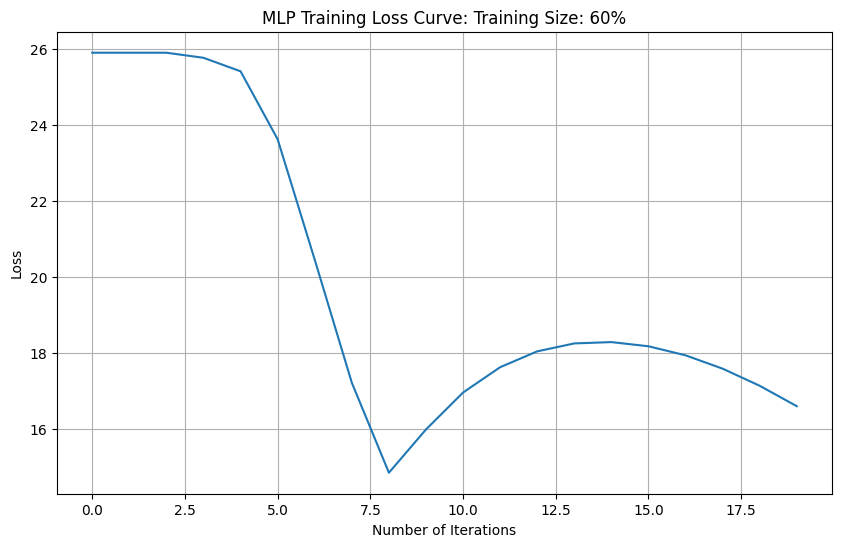

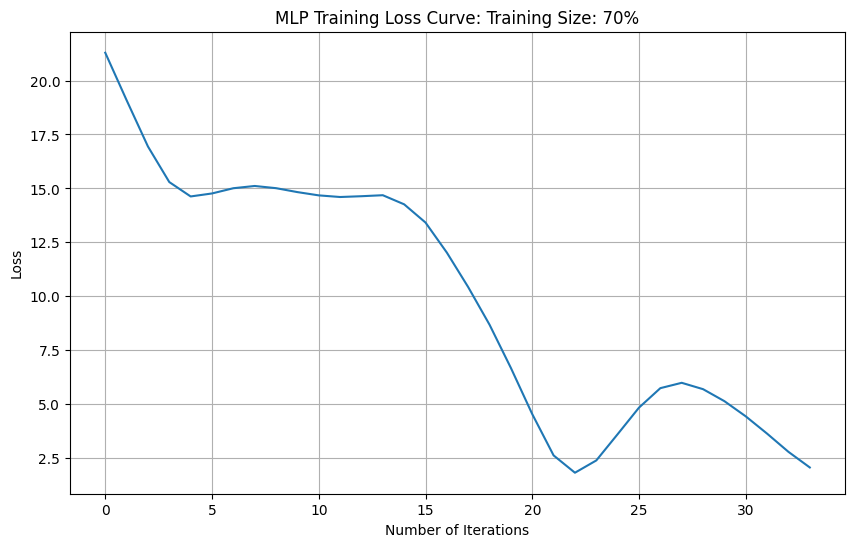

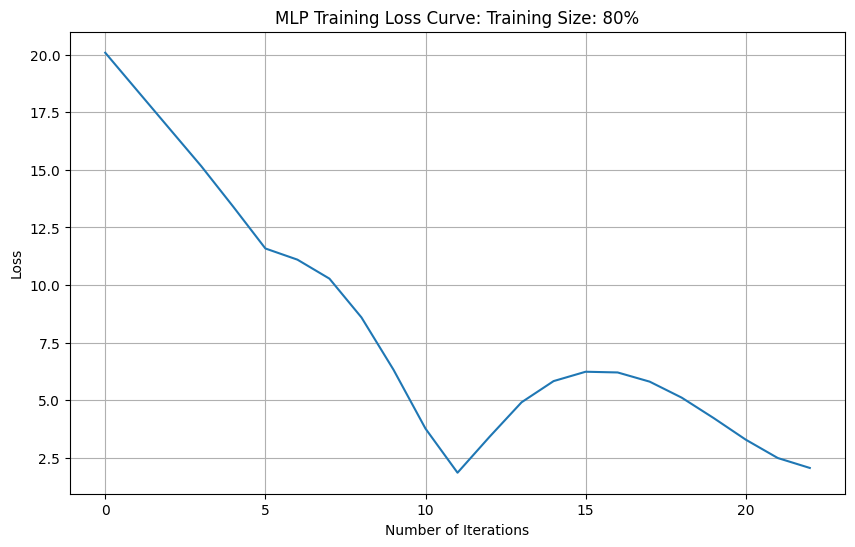

In [ ]:
# Plot training loss curve for each trained MLP model
for model_data in trained_models_mlp:
    model = model_data["Model"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title(f'MLP Training Loss Curve: Training Size: {training_size}%')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

### ROC and AOC curve

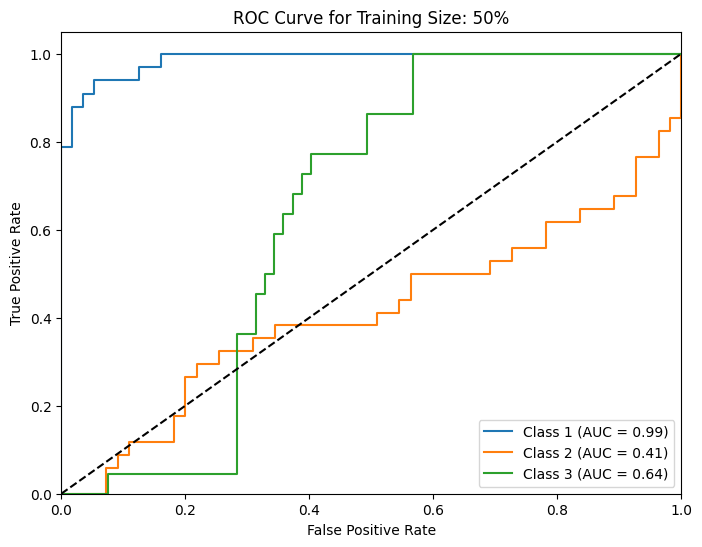

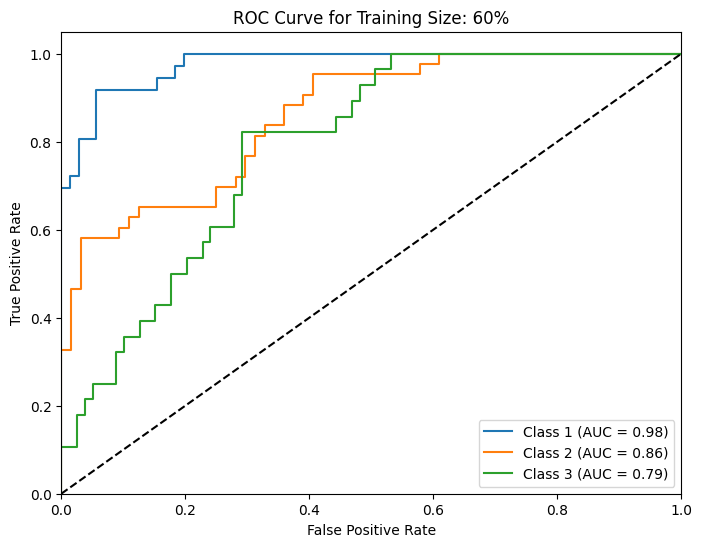

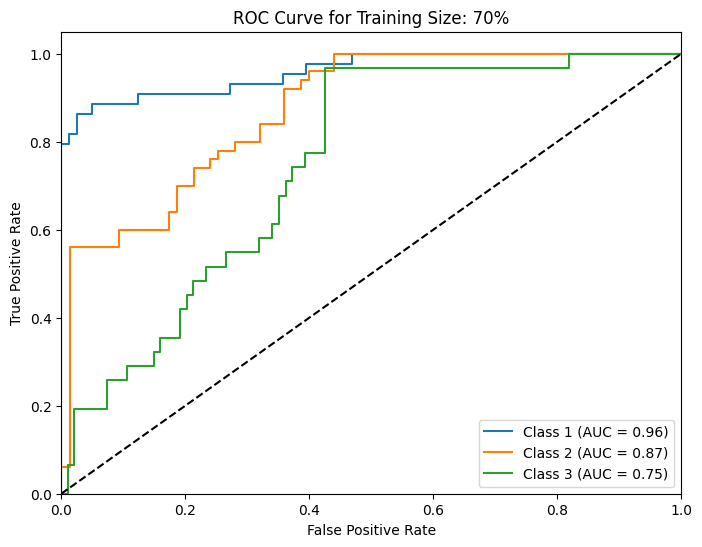

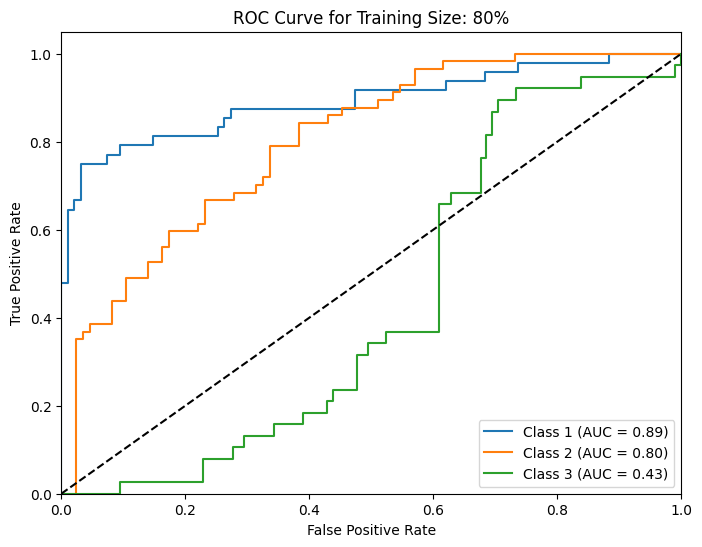

In [ ]:
from sklearn.metrics import roc_curve, auc

# Since this is a multi-class problem, we'll use a One-vs-Rest (OvR) approach for ROC curves
for model_data in trained_models_mlp:
    model = model_data["Model"]
    X_test = model_data["X_test"]
    y_test = model_data["y_test"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(8, 6)) # Create a new figure for each plot

    # Get predicted probabilities for each class
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class using OvR
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(y_test))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i+1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--') # Plot random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Training Size: {training_size}%') # Add title for each plot
    plt.legend(loc="lower right")
    plt.show()

### MLP with PCA-Reduced Data

In [ ]:
# Apply the existing PCA transformation to the scaled data
X_pca_reduced_mlp = pca.fit_transform(X_scaled)

print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca_reduced_mlp.shape[1]}")
print("\nData after PCA for Random Forest:")
display(pd.DataFrame(X_pca_reduced_mlp).head())


Original number of features: 13
Reduced number of features after PCA: 10

Data after PCA for Random Forest:


,0,1,2,3,4,5,6,7,8,9
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366


### Calculate MLP performance with PCA-Reduced Data for different test sizes

In [ ]:
results_mlp_pca = []
confusion_matrices_mlp_pca = []
trained_models_mlp_pca = []


for size in training_sizes:
  X_train_pca_mlp, X_test_pca_mlp, y_train, y_test = train_test_split(X_pca_reduced_mlp, y, test_size=size, random_state=42)
  mlp_pca = MLPClassifier(max_iter=1500, momentum=0.7, learning_rate_init=0.0005)

  mlp_pca.fit(X_train_pca_mlp, y_train.values.ravel())
  y_pred_pca_mlp = mlp_pca.predict(X_test_pca_mlp)

  acc_pca_mlp = accuracy_score(y_test, y_pred_pca_mlp)
  precision_pca_mlp = precision_score(y_test, y_pred_pca_mlp, average='weighted', zero_division=0)
  recall_pca_mlp = recall_score(y_test, y_pred_pca_mlp, average='weighted')
  f1_pca_mlp = f1_score(y_test, y_pred_pca_mlp, average='weighted')

  cm_pca_mlp = confusion_matrix(y_test, y_pred_pca_mlp)

  results_mlp_pca.append({
      "Training size":int (size*100),
      "Accuracy":acc_pca_mlp,
      "Precision": precision_pca_mlp,
      "Recall": recall_pca_mlp,
      "F1-score": f1_pca_mlp
  })

  confusion_matrices_mlp_pca.append({
      "Training size":int (size*100),
      "Confusion Matrix":cm_pca_mlp
  })

  trained_models_mlp_pca.append({
      "Training size":int (size*100),
      "Model": mlp_pca
  })



### Print MLP Performance Table and Graphs with PCA-Reduced Data

,Training size,Accuracy,Precision,Recall,F1-score
0,50,0.988764,0.989085,0.988764,0.988759
1,60,0.971963,0.973461,0.971963,0.971842
2,70,0.952000,0.954961,0.952000,0.951970
3,80,0.944056,0.946736,0.944056,0.943487


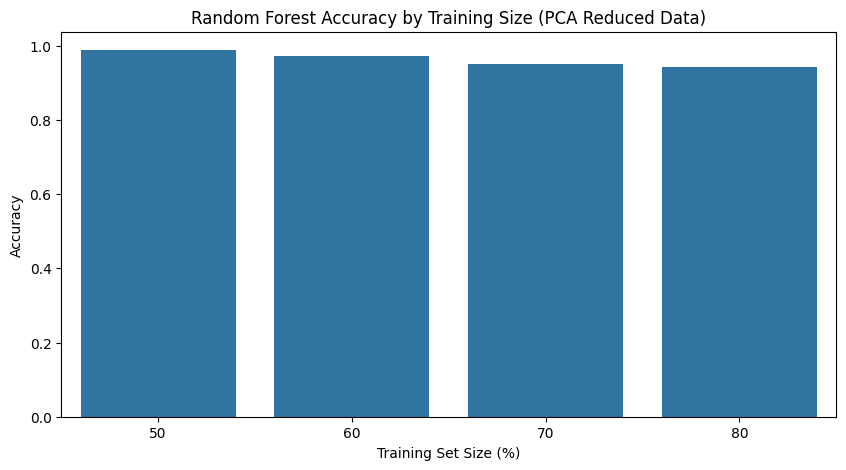

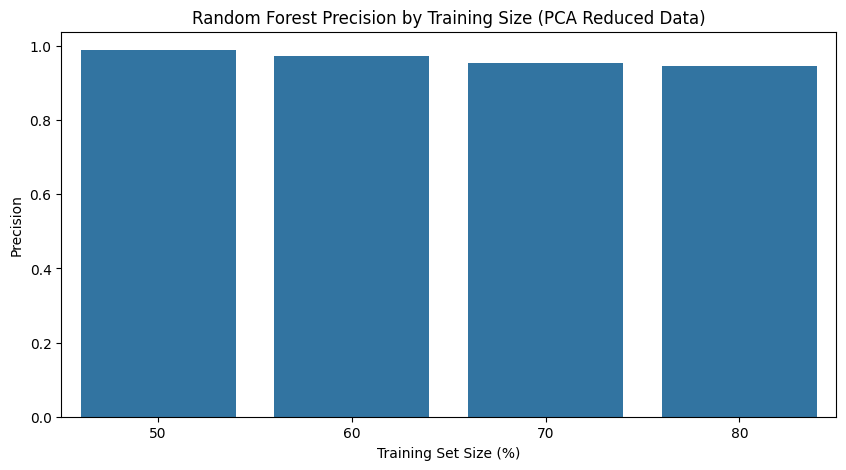

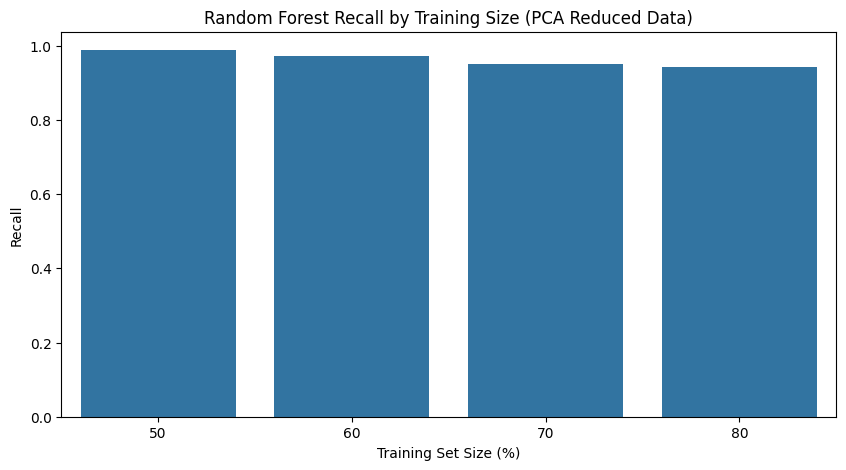

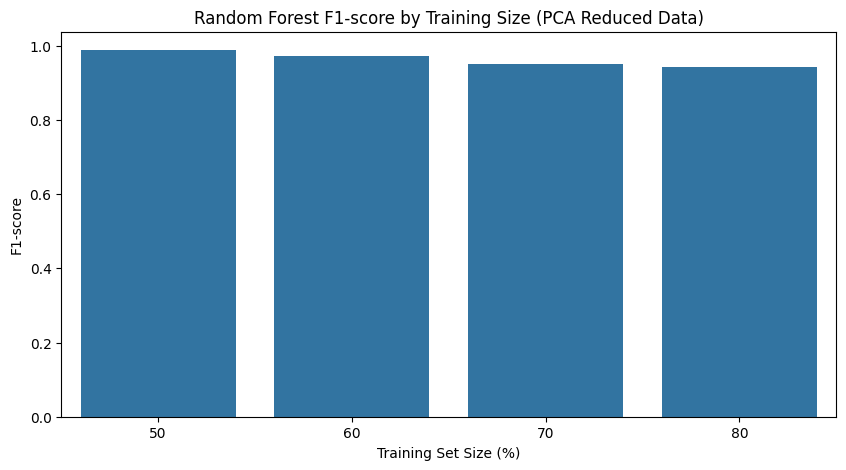

In [ ]:
df_mlp_pca = pd.DataFrame(results_mlp_pca)
display(df_mlp_pca)

# Plot Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mlp_pca, x='Training size', y='Accuracy')
plt.title('Random Forest Accuracy by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mlp_pca, x='Training size', y='Precision')
plt.title('Random Forest Precision by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Precision')
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mlp_pca, x='Training size', y='Recall')
plt.title('Random Forest Recall by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Recall')
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mlp_pca, x='Training size', y='F1-score')
plt.title('Random Forest F1-score by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1-score')
plt.show()



### Show Confusion Matrices for MLP with PCA-Reduced Data

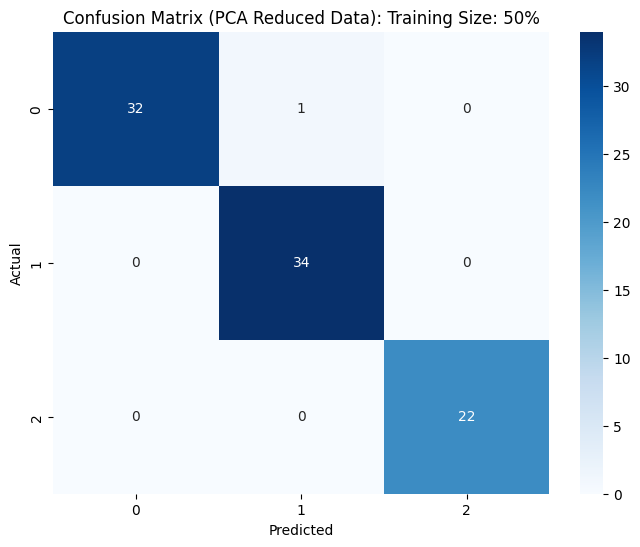

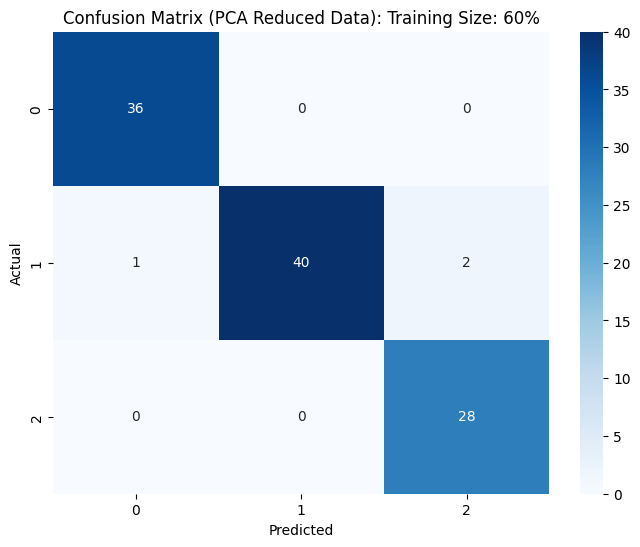

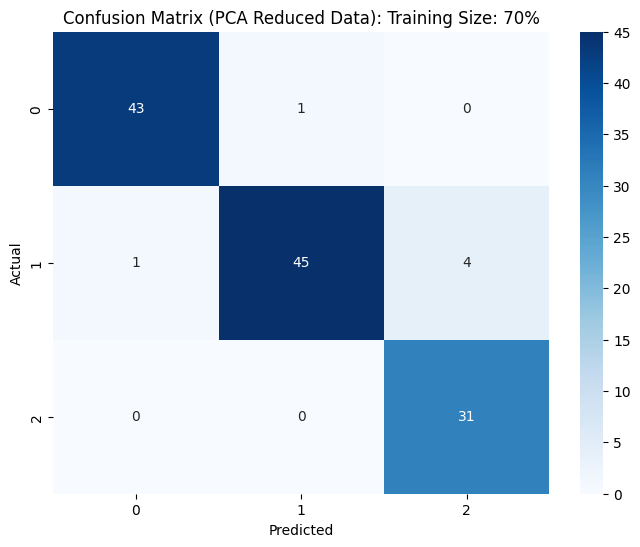

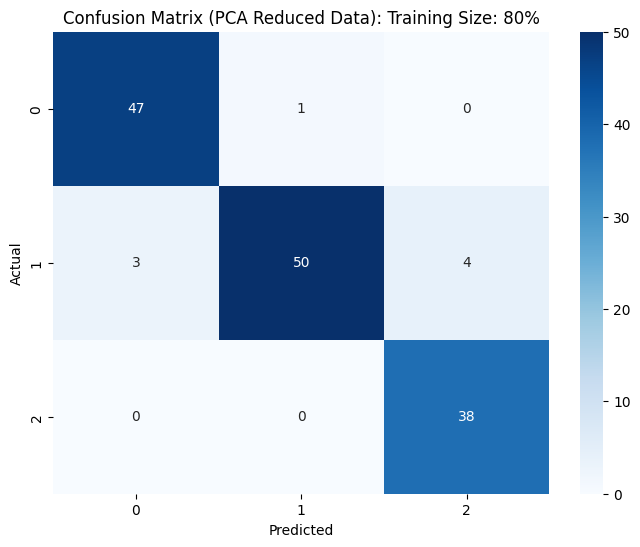

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices_mlp_pca:
    cm = cm_data["Confusion Matrix"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (PCA Reduced Data): Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Training Loss generation curve with PCA-Reduced Data

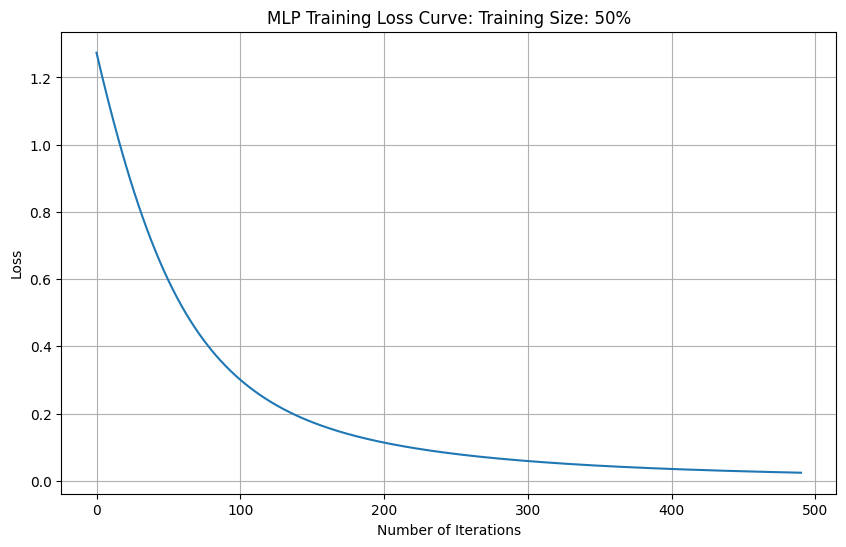

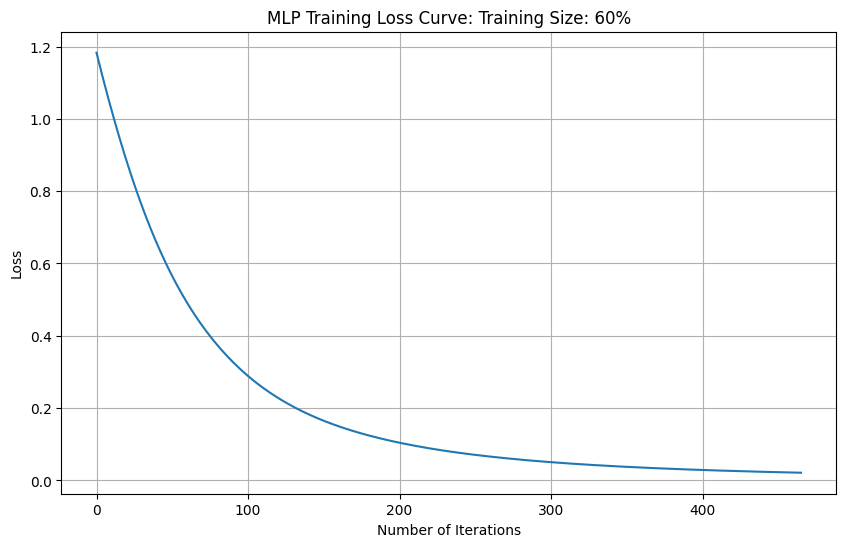

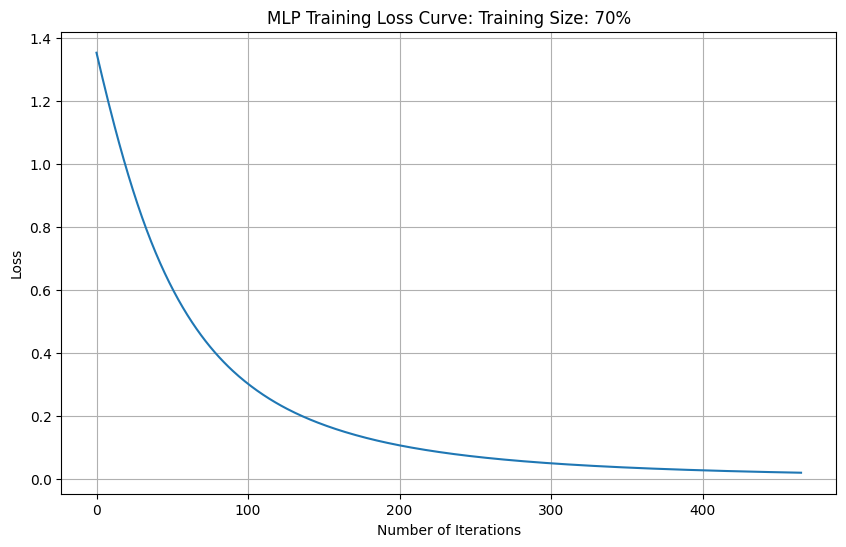

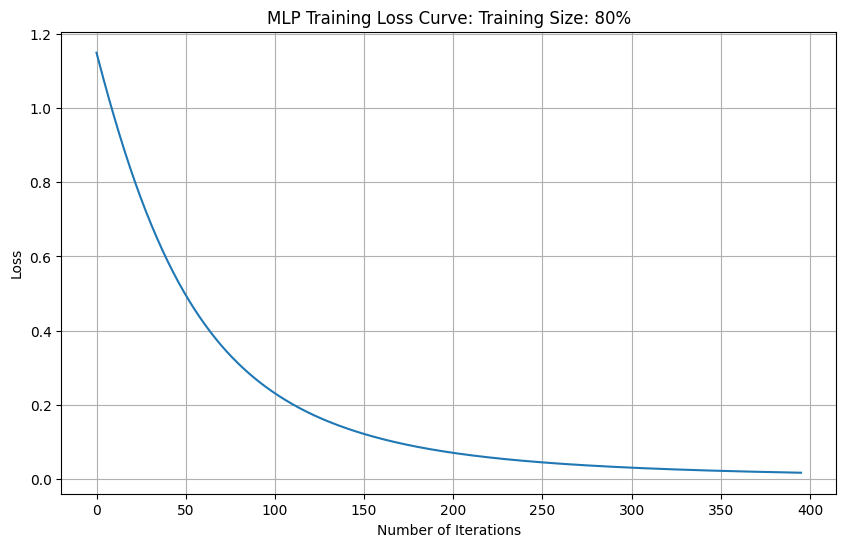

In [ ]:
# Plot training loss curve for each trained MLP model
for model_data in trained_models_mlp_pca:
    model = model_data["Model"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title(f'MLP Training Loss Curve: Training Size: {training_size}%')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

## ===== Random Forest =====

### Calculate values for different test size

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

training_sizes = [0.5, 0.6, 0.7, 0.8]

results_rf = []
confusion_matrices_rf = []
trained_models_rf = [] # Add a list to store trained models


for size in training_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
  rf = RandomForestClassifier(random_state=42)


  rf.fit(X_train, y_train.values.ravel())
  y_pred_test = rf.predict(X_test)
  y_pred_train = rf.predict(X_train)


  acc_test = accuracy_score(y_test, y_pred_test)
  precision_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0) # Calculate weighted precision, handle zero division
  recall_test = recall_score(y_test, y_pred_test, average='weighted') # Calculate weighted recall
  f1_test = f1_score(y_test, y_pred_test, average='weighted') # Calculate weighted F1-score

  acc_train = accuracy_score(y_train, y_pred_train)
  precision_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
  recall_train = recall_score(y_train, y_pred_train, average='weighted')
  f1_train = f1_score(y_train, y_pred_train, average='weighted')


  cm = confusion_matrix(y_test, y_pred_test) # Calculate confusion matrix

  results_rf.append({
      "Training size":int (size*100),
      "Accuracy":acc_test,
      "Precision": precision_test,
      "Recall": recall_test,
      "F1-score": f1_test
  })

  confusion_matrices_rf.append({ # Store confusion matrix with metadata
      "Training size":int (size*100),
      "Confusion Matrix":cm
  })

  trained_models_rf.append({ # Store the trained model with metadata
      "Training size":int (size*100),
      "Model": rf,
      "X_test": X_test,
      "y_test": y_test
  })

### Print Evalution Table and Graphs

,Training size,Accuracy,Precision,Recall,F1-score
0,50,0.977528,0.978777,0.977528,0.977498
1,60,0.934579,0.934670,0.934579,0.934515
2,70,0.952000,0.952117,0.952000,0.951798
3,80,0.951049,0.952787,0.951049,0.950976


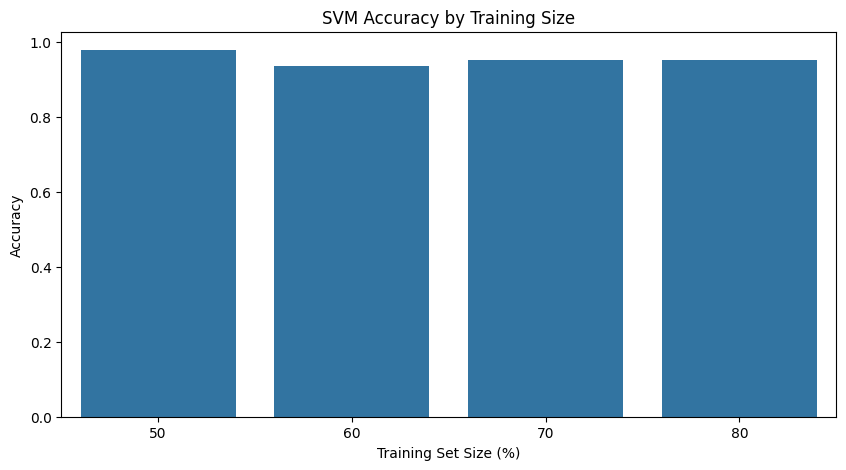

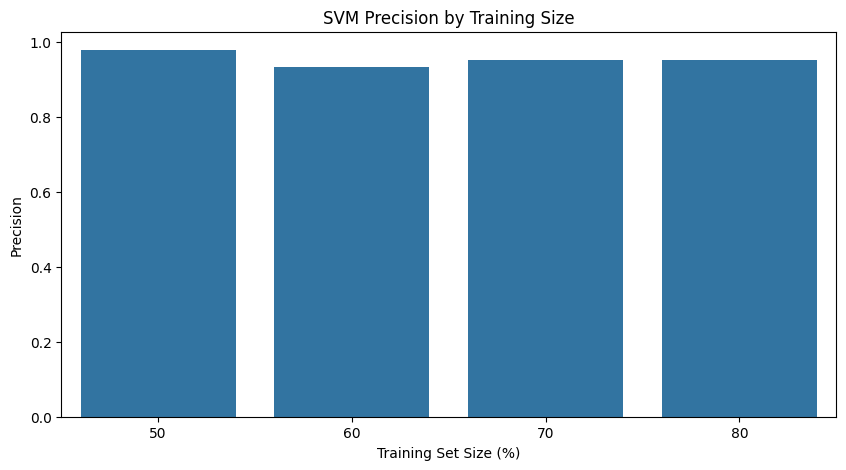

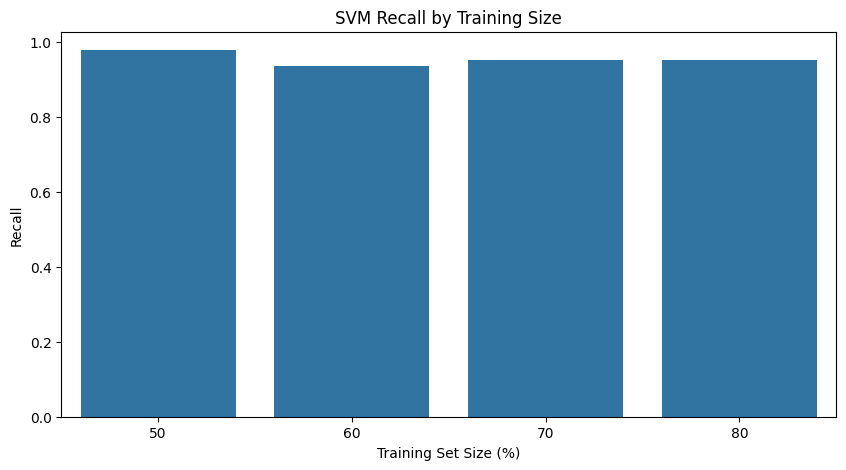

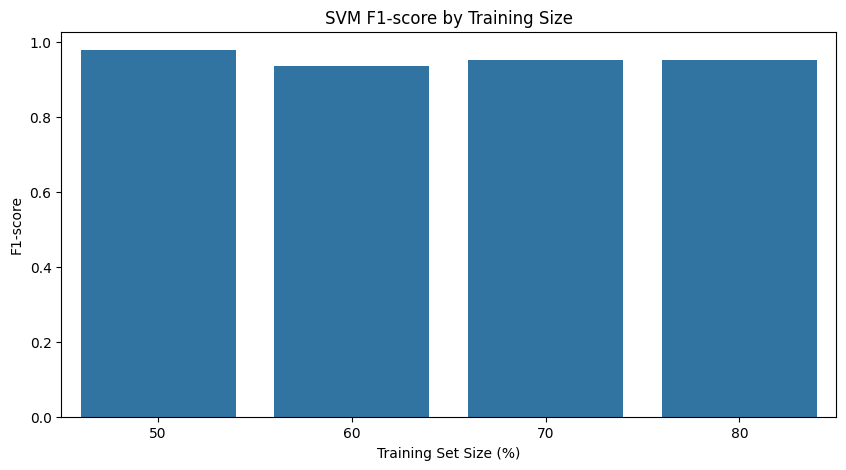

In [ ]:
df = pd.DataFrame(results_rf)
display(df) # Display the DataFrame as a table

# Plot Accuracy
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Accuracy')
plt.title('SVM Accuracy by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Accuracy') # Add y-axis label
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Precision')
plt.title('SVM Precision by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Precision') # Add y-axis label
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Recall')
plt.title('SVM Recall by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Recall') # Add y-axis label
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='F1-score')
plt.title('SVM F1-score by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('F1-score') # Add y-axis label
plt.show()

### Show Confusion Matrices

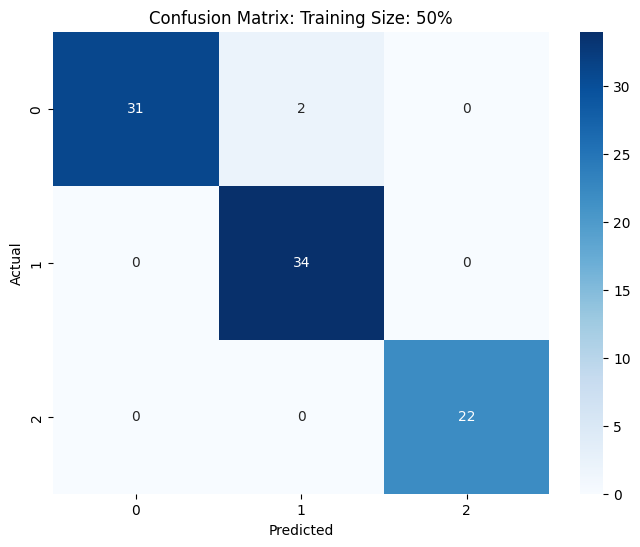

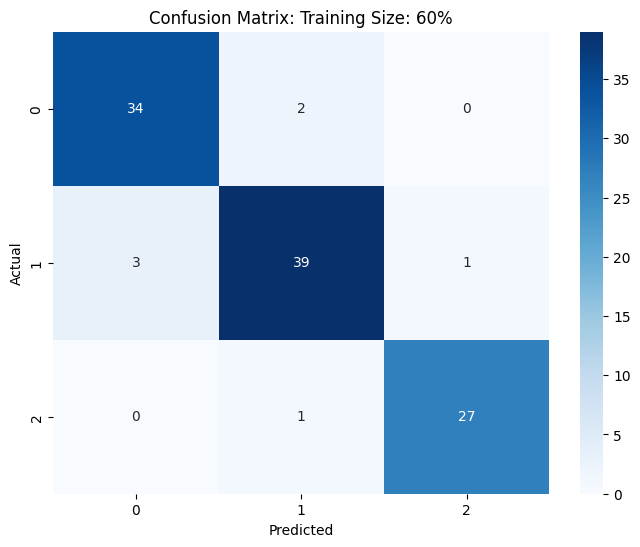

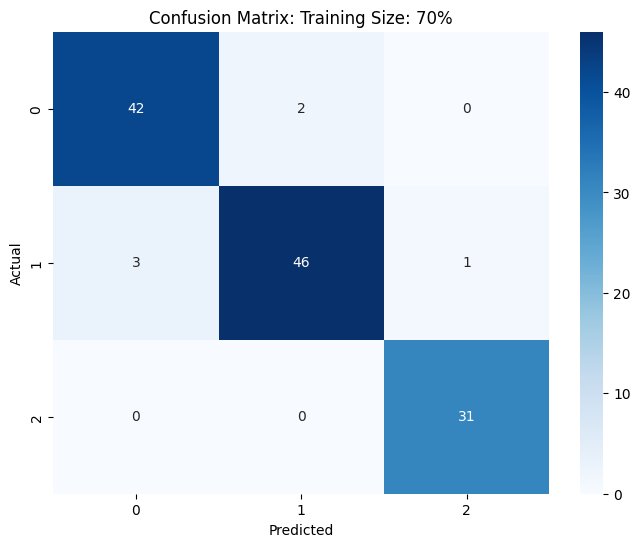

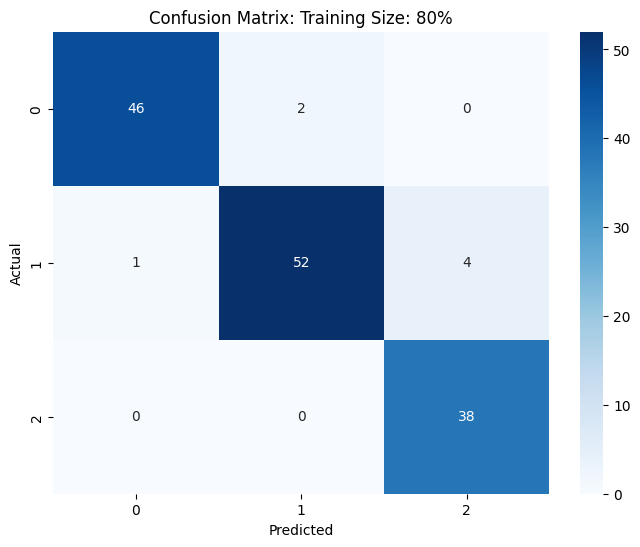

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices_rf:
    cm = cm_data["Confusion Matrix"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### ROC and AOC curve

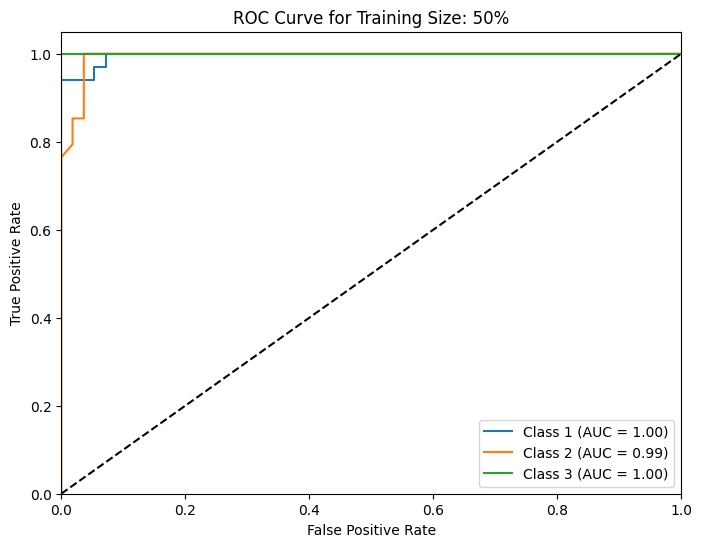

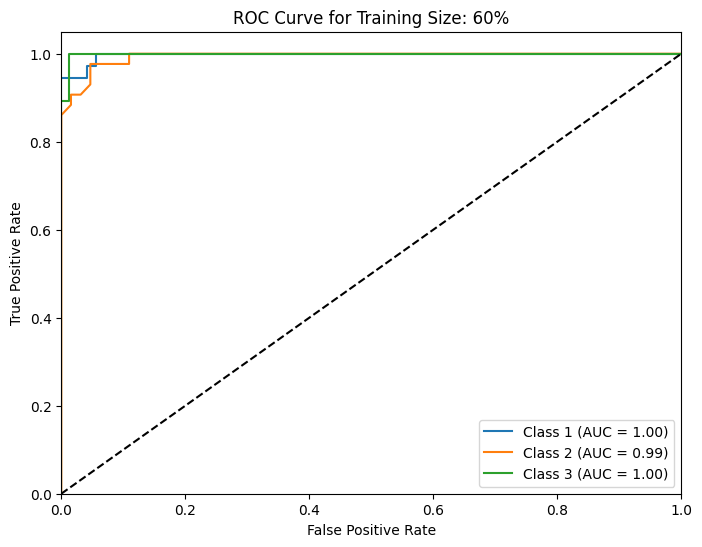

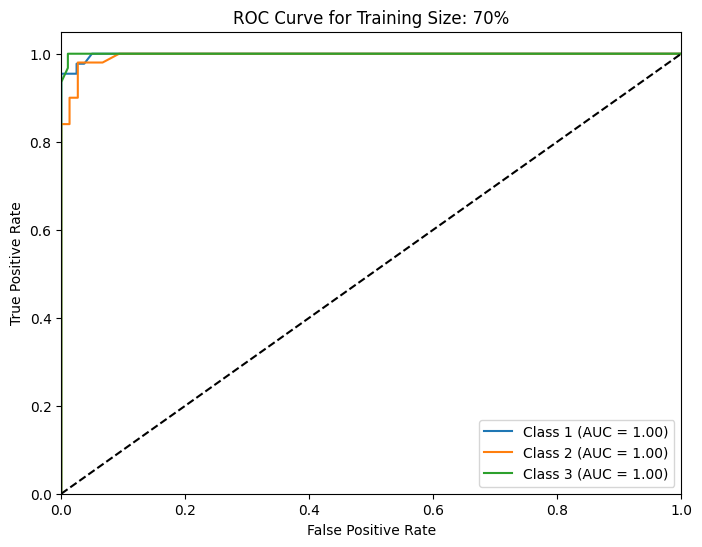

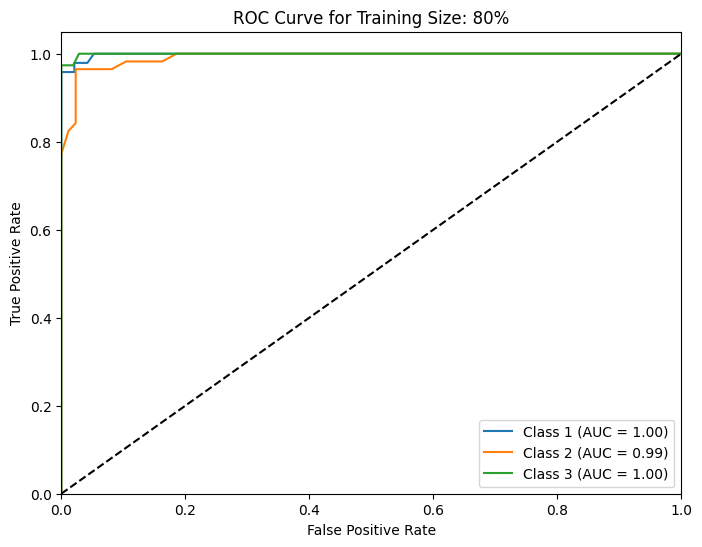

In [ ]:
from sklearn.metrics import roc_curve, auc

# Since this is a multi-class problem, we'll use a One-vs-Rest (OvR) approach for ROC curves
for model_data in trained_models_rf:
    model = model_data["Model"]
    X_test = model_data["X_test"]
    y_test = model_data["y_test"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(8, 6)) # Create a new figure for each plot

    # Get predicted probabilities for each class
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class using OvR
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(y_test))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i+1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--') # Plot random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Training Size: {training_size}%') # Add title for each plot
    plt.legend(loc="lower right")
    plt.show()

### Random Forest with PCA-Reduced Data

In [ ]:
# Apply the existing PCA transformation to the scaled data
X_pca_reduced_rf = pca.fit_transform(X_scaled)

print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca_reduced_rf.shape[1]}")
print("\nData after PCA for Random Forest:")
display(pd.DataFrame(X_pca_reduced_rf).head())


Original number of features: 13
Reduced number of features after PCA: 10

Data after PCA for Random Forest:


,0,1,2,3,4,5,6,7,8,9
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366


### Calculate Random Forest performance with PCA-Reduced Data for different test sizes

In [ ]:
results_rf_pca = []
confusion_matrices_rf_pca = []


for size in training_sizes:
  X_train_pca_rf, X_test_pca_rf, y_train, y_test = train_test_split(X_pca_reduced_rf, y, test_size=size, random_state=42)
  rf_pca = RandomForestClassifier(random_state=42)

  rf_pca.fit(X_train_pca_rf, y_train.values.ravel())
  y_pred_pca_rf = rf_pca.predict(X_test_pca_rf)

  acc_pca_rf = accuracy_score(y_test, y_pred_pca_rf)
  precision_pca_rf = precision_score(y_test, y_pred_pca_rf, average='weighted', zero_division=0)
  recall_pca_rf = recall_score(y_test, y_pred_pca_rf, average='weighted')
  f1_pca_rf = f1_score(y_test, y_pred_pca_rf, average='weighted')

  cm_pca_rf = confusion_matrix(y_test, y_pred_pca_rf)

  results_rf_pca.append({
      "Training size":int (size*100),
      "Accuracy":acc_pca_rf,
      "Precision": precision_pca_rf,
      "Recall": recall_pca_rf,
      "F1-score": f1_pca_rf
  })

  confusion_matrices_rf_pca.append({
      "Training size":int (size*100),
      "Confusion Matrix":cm_pca_rf
  })



### Print Random Forest Performance Table and Graphs with PCA-Reduced Data

,Training size,Accuracy,Precision,Recall,F1-score
0,50,0.966292,0.966583,0.966292,0.966277
1,60,0.962617,0.963637,0.962617,0.962677
2,70,0.952000,0.951878,0.952000,0.951834
3,80,0.944056,0.943992,0.944056,0.943736


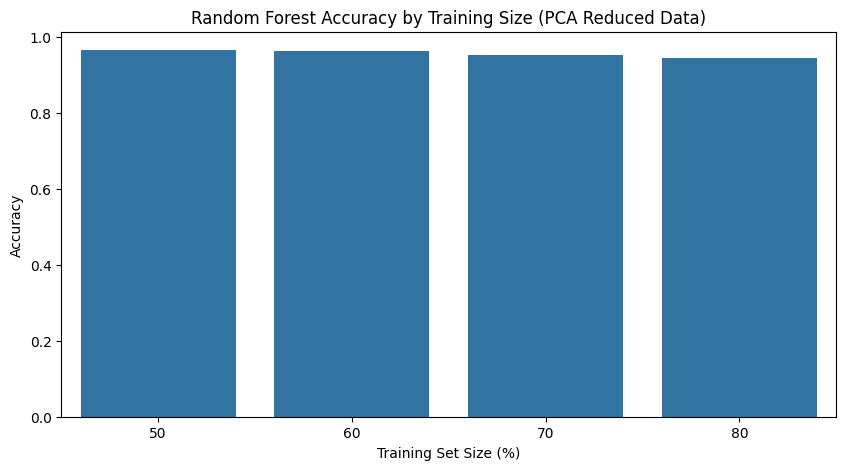

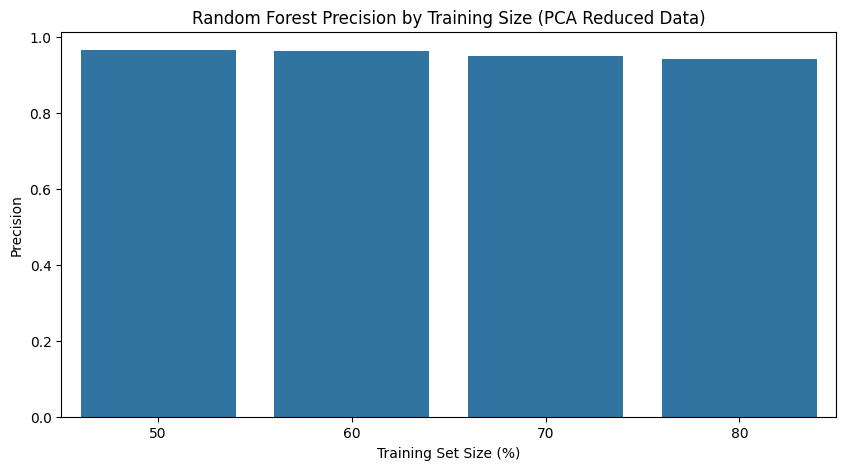

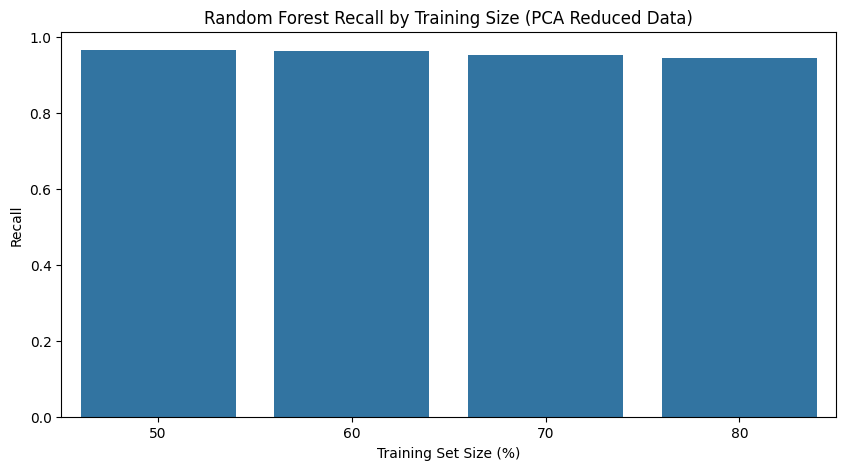

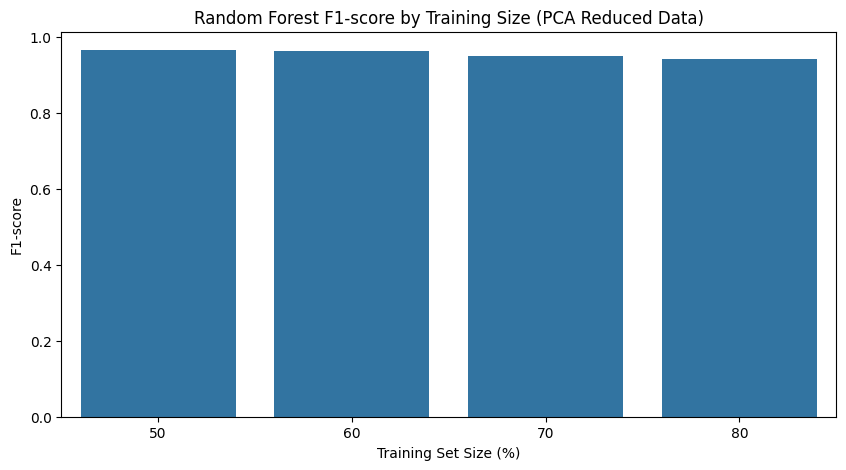

In [ ]:
df_rf_pca = pd.DataFrame(results_rf_pca)
display(df_rf_pca)

# Plot Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(data=df_rf_pca, x='Training size', y='Accuracy')
plt.title('Random Forest Accuracy by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5))
sns.barplot(data=df_rf_pca, x='Training size', y='Precision')
plt.title('Random Forest Precision by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Precision')
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
sns.barplot(data=df_rf_pca, x='Training size', y='Recall')
plt.title('Random Forest Recall by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Recall')
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5))
sns.barplot(data=df_rf_pca, x='Training size', y='F1-score')
plt.title('Random Forest F1-score by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1-score')
plt.show()



### Show Confusion Matrices for Random Forest with PCA-Reduced Data

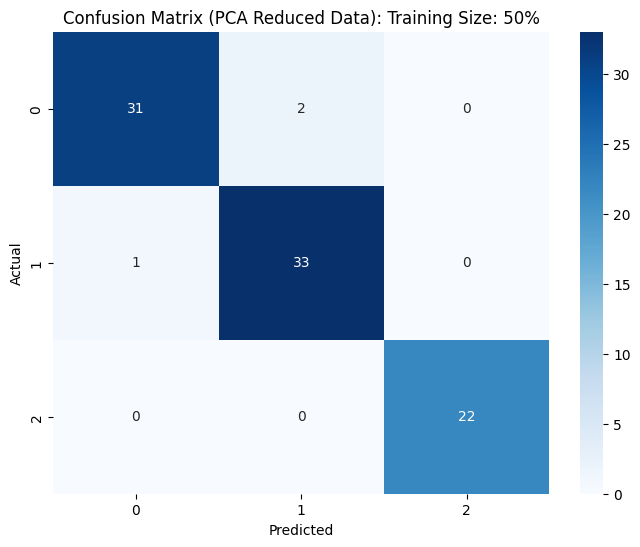

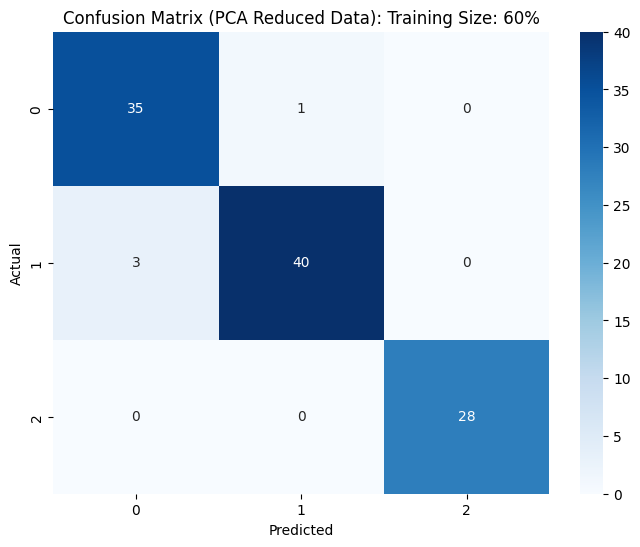

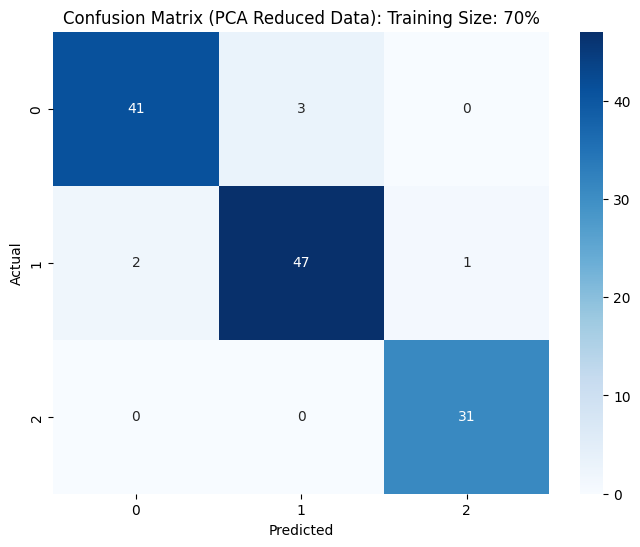

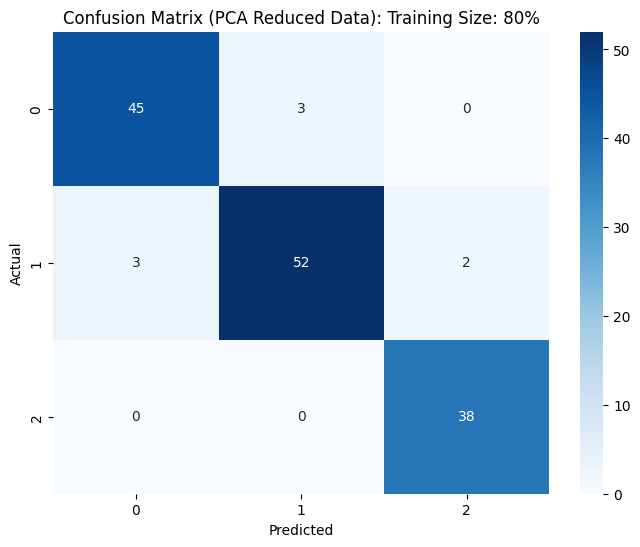

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices_rf_pca:
    cm = cm_data["Confusion Matrix"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (PCA Reduced Data): Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# **Machine Learning Model Performance Report**

## Wine Dataset Evaluation

### 1. Support Vector Machine (SVM)

This section evaluates how SVM models perform on the Wine dataset, focusing on the influence of kernel choice, training set size, and dimensionality reduction using PCA.

#### Effect of Training Size and Kernel Selection:

SVM models were trained using four kernel functions—linear, polynomial, gaussian, and sigmoid—on different proportions of the dataset (50%, 60%, 70%, and 80%). Performance was assessed using Accuracy, Precision, Recall, and F1-score.

*[Insert Bar plots for Accuracy, Precision, Recall, and F1-score vs. Training Size for each kernel here]*

#### Results Summary:

*[Insert table of SVM results on Original Wine Data here]*

Across all training sizes, the linear kernel consistently produced the strongest results. Both polynomial and gaussian kernels delivered fluctuating performance depending on the training set size, while the sigmoid kernel lagged behind across all scenarios. Increasing the training size generally enhanced the performance for every kernel, highlighting the importance of larger datasets for model generalization.

#### Influence of PCA Feature Reduction:

PCA was used to reduce the feature dimensionality of the Wine dataset while retaining most of its variance. The SVM models were then retrained on this reduced representation.

*[Insert table of SVM results on PCA-Reduced Data here]*

The results show that PCA positively influenced the performance of the SVM models, especially when using the linear and gaussian kernels. Metrics such as accuracy, precision, and recall improved, indicating that the lower-dimensional representation made patterns in the data more accessible to the models.

#### Confusion Matrices:

*[Insert Confusion Matrices for SVM on Original Data here]*

*[Insert Confusion Matrices for SVM on PCA-Reduced Data here]*

The confusion matrices reveal that PCA, particularly in combination with the linear kernel, resulted in a higher proportion of correct classifications compared to the original feature space.

#### ROC and AUC Curves:

*[Insert ROC and AUC curves for SVM on Original Data here]*

The ROC and AUC plots reinforce these findings, with the linear kernel achieving the highest AUC values and PCA further enhancing the separation between classes.

---

### 2. Multilayer Perceptron (MLP)

This section examines how MLP models perform on the Wine dataset, with emphasis on training size effects, learning behavior, and PCA-based dimensionality reduction.

#### Effect of Training Size:

The MLP model was trained with dataset splits of 50%, 60%, 70%, and 80% to observe changes in performance as training size increased.

*[Insert Bar plots for Accuracy, Precision, Recall, and F1-score vs. Training Size for MLP here]*

#### Results Summary:

*[Insert table of MLP results on Original Wine Data here]*

On the original dataset, the MLP's performance varied across training sizes without showing a consistent upward trend. This suggests that the chosen hyperparameters may not have been fully optimized for the dataset.

#### Training Loss Curve:

*[Insert MLP Training Loss Curves here]*

The loss curves provide insight into the convergence process. While the loss generally decreased over time, the curves indicate potential room for improvement through hyperparameter tuning or extending training epochs.

#### Effect of PCA Feature Reduction:

The MLP model was also tested on PCA-transformed features.

*[Insert table of MLP results on PCA-Reduced Data here]*

With PCA, the MLP achieved a notable boost in performance. Both accuracy and other metrics improved significantly, suggesting that dimensionality reduction minimized noise and allowed the model to focus on the most important patterns in the data.

#### Confusion Matrices:

*[Insert Confusion Matrices for MLP on Original Data here]*

*[Insert Confusion Matrices for MLP on PCA-Reduced Data here]*

The confusion matrices show far fewer misclassifications on the PCA-reduced dataset compared to the original, underscoring PCA's positive effect.

#### ROC and AUC Curves:

*[Insert ROC and AUC curves for MLP on Original Data here]*

When PCA was applied, the ROC and AUC curves showed higher AUC values, confirming that the MLP could distinguish classes more effectively with reduced dimensions.

---

### 3. Random Forest

This section reviews the Random Forest model's performance on the Wine dataset, considering both original and PCA-transformed features.

#### Effect of Training Size:

Random Forest was evaluated on training splits of 50%, 60%, 70%, and 80%.

*[Insert Bar plots for Accuracy, Precision, Recall, and F1-score vs. Training Size for Random Forest here]*

#### Results Summary:

*[Insert table of Random Forest results on Original Wine Data here]*

The Random Forest model produced strong and stable results across all training sizes on the original dataset. Its robustness suggests that the algorithm is naturally well-suited to this classification task.

#### Effect of PCA Feature Reduction:

The same model was then trained on PCA-reduced data.

*[Insert table of Random Forest results on PCA-Reduced Data here]*

Unlike with SVM and MLP, PCA slightly reduced the performance of Random Forest. This outcome suggests that the original features carried richer discriminatory information for the tree-based method, and dimensionality reduction removed some of that useful detail.

#### Confusion Matrices:

*[Insert Confusion Matrices for Random Forest on Original Data here]*

*[Insert Confusion Matrices for Random Forest on PCA-Reduced Data here]*

The confusion matrices confirm this observation, showing fewer misclassifications in the original dataset compared to PCA-reduced features.

#### ROC and AUC Curves:

*[Insert ROC and AUC curves for Random Forest on Original Data here]*

The ROC and AUC plots further emphasize that Random Forest maintained stronger class separation on the original dataset compared to PCA-reduced data.
